# Hyper-mutated and hypo-mutated threshold study and mutation frequency analysis

In [96]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [97]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Datasets/The Metastatic Breast Cancer Project (Provisional, December 2021)")

# TOTAL DUCTAL 

In [98]:
data_mutation_TOTAL_ductal=pd.read_csv('mutation_table_MBCproject_TOTAL_ductal.csv', sep=None, engine='python')
# delete the first column, that shows the number of each row
data_mutation_TOTAL_ductal = data_mutation_TOTAL_ductal.iloc[:, 1:]
data_mutation_TOTAL_ductal

,PATIENT_ID,Tumor_Sample_Barcode,Hugo_Symbol,Chromosome,Start_Position,End_Position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,HGVSc,HGVSp_Short,Protein_position,Transcript_ID,Gene_length
0,MBCProject_0aTBfPcG,MBC-MBCProject_0aTBfPcG-Tumor-SM-DL3W1,DNAJC11,1,6697390,6697390,Silent,SNP,G,G,A,ENST00000377577.5:c.1392C>T,p.I464=,464.0,ENST00000377577,67757
1,MBCProject_0aTBfPcG,MBC-MBCProject_0aTBfPcG-Tumor-SM-DL3W1,MTOR,1,11319309,11319309,Missense_Mutation,SNP,C,C,T,ENST00000361445.4:c.158G>A,p.R53Q,53.0,ENST00000361445,155973
2,MBCProject_0aTBfPcG,MBC-MBCProject_0aTBfPcG-Tumor-SM-DL3W1,PTCHD2,1,11561645,11561645,Missense_Mutation,SNP,G,G,A,ENST00000294484.6:c.596G>A,p.R199Q,199.0,ENST00000294484,58419
3,MBCProject_0aTBfPcG,MBC-MBCProject_0aTBfPcG-Tumor-SM-DL3W1,KIAA0319L,1,36023322,36023322,5'Flank,SNP,A,A,C,NaN,NaN,NaN,ENST00000325722,124461
4,MBCProject_0aTBfPcG,MBC-MBCProject_0aTBfPcG-Tumor-SM-DL3W1,FOXO6,1,41847733,41847733,Missense_Mutation,SNP,C,C,T,ENST00000372591.1:c.860C>T,p.S287L,287.0,ENST00000372591,21669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19868,MBCProject_zyt5TKFB,MBC-MBCProject_zyt5TKFB-Tumor-SM-CGM59,NRSN2,20,333991,333991,Silent,SNP,C,C,T,ENST00000382285.2:c.327C>T,p.N109=,109.0,ENST00000382285,12879
19869,MBCProject_zyt5TKFB,MBC-MBCProject_zyt5TKFB-Tumor-SM-CGM59,CHRNA4,20,61986887,61986887,Intron,SNP,G,G,C,ENST00000370263.4:c.383+440C>G,p.*128*,NaN,ENST00000370263,34334
19870,MBCProject_zyt5TKFB,MBC-MBCProject_zyt5TKFB-Tumor-SM-CGM59,CHRNA4,20,61987386,61987386,Silent,SNP,G,G,A,ENST00000370263.4:c.324C>T,p.V108=,108.0,ENST00000370263,34334
19871,MBCProject_zyt5TKFB,MBC-MBCProject_zyt5TKFB-Tumor-SM-CGM59,KCNQ2,20,62078103,62078103,Silent,SNP,G,G,A,ENST00000359125.2:c.384C>T,p.I128=,128.0,ENST00000359125,66452


In [99]:
# check if there are duplicate rows 
data_mutation_TOTAL_ductal.duplicated().sum()

0

In [100]:
data_mutation_TOTAL_ductal['PATIENT_ID'].nunique()

136

In [101]:
data_mutation_TOTAL_ductal['Tumor_Sample_Barcode'].nunique()

136

### Mutation Rate analysis

In [102]:
# add a column to the dataset representing the mutated bases length (End_Position-Start_Position+1)
data_mutation_TOTAL_ductal.loc[:, 'Mutation_length'] = data_mutation_TOTAL_ductal['End_Position']-data_mutation_TOTAL_ductal['Start_Position']+1

In [103]:
# extract PATIENT_ID and Mutation_length
pts_mutation_length_TOTAL_ductal = data_mutation_TOTAL_ductal[['PATIENT_ID', 'Mutation_length']]

In [104]:
# group by PATIENT_ID and sum the mutation lengths for each pts
mutation_TOTAL_ductal_group_by_pts=pts_mutation_length_TOTAL_ductal.groupby(['PATIENT_ID'])['Mutation_length'].sum().reset_index()
mutation_TOTAL_ductal_group_by_pts.rename(columns = {'Mutation_length':'Total_sum_mutated_bases'}, inplace = True)

In [105]:
# extract Hugo_Symbol and Gene_length
gene_length_for_each_mutation_TOTAL_ductal = data_mutation_TOTAL_ductal[['Hugo_Symbol', 'Gene_length']]

In [106]:
# look at the number of distinct genes
gene_length_for_each_mutation_TOTAL_ductal['Hugo_Symbol'].nunique()

9553

In [107]:
# group by gene (Hugo_Symbol) 
mutation_TOTAL_ductal_group_by_gene=gene_length_for_each_mutation_TOTAL_ductal.groupby(['Hugo_Symbol'])['Gene_length'].max().reset_index()

In [108]:
# compute the total gene length (for all the genes in the dataset)
total_GeneLength_TOTAL_ductal = mutation_TOTAL_ductal_group_by_gene['Gene_length'].sum()

In [109]:
# add a column to the dataset representing the mutation rate for each patient (Mutation_rate= Mutation_length/total_gene_length)
mutation_TOTAL_ductal_group_by_pts["Mutation_rate"] = mutation_TOTAL_ductal_group_by_pts["Total_sum_mutated_bases"]/total_GeneLength_TOTAL_ductal

In [110]:
# multiply the Mutation_rate values for 10^6
mutation_TOTAL_ductal_group_by_pts["Mutation_rate*10^6"] = mutation_TOTAL_ductal_group_by_pts["Mutation_rate"]*1000000

In [111]:
# the PATIENT_IDs are sorted for descending order of mutation rate 
mutation_TOTAL_ductal_group_by_pts= mutation_TOTAL_ductal_group_by_pts.sort_values(by="Mutation_rate", ascending=False)

In [112]:
patient_mutation_rate_TOTAL_ductal=mutation_TOTAL_ductal_group_by_pts[['PATIENT_ID', 'Mutation_rate*10^6' ]]

In [113]:
# adjust the indices
patient_mutation_rate_TOTAL_ductal = patient_mutation_rate_TOTAL_ductal.reset_index()
patient_mutation_rate_TOTAL_ductal = patient_mutation_rate_TOTAL_ductal.drop('index', axis=1)

In [114]:
patients_TOTAL_ductal=np.arange(0,136,1)
# convert a series into a Numpy array
mutation_rate_TOTAL_ductal=mutation_TOTAL_ductal_group_by_pts[['Mutation_rate*10^6']].to_numpy()

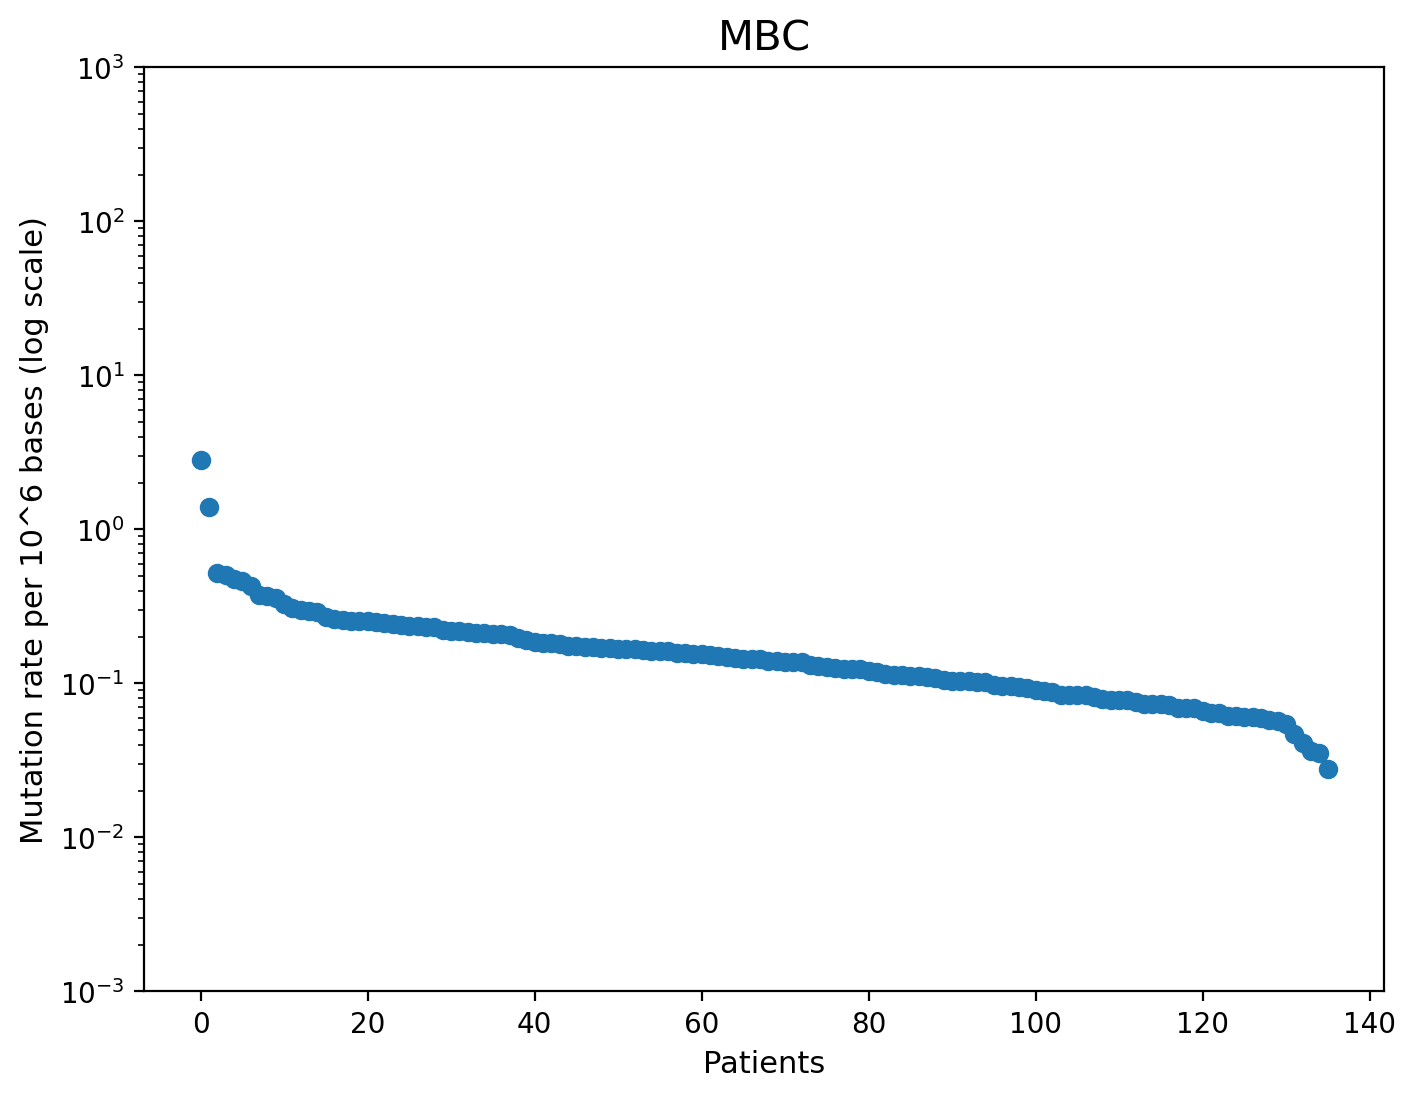

In [115]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.yscale("log") 
#set axes limit
plt.ylim(0.001, 1000)
plt.scatter(patients_TOTAL_ductal, mutation_rate_TOTAL_ductal)
plt.xlabel("Patients", fontsize=11)
plt.ylabel("Mutation rate per 10^6 bases (log scale)", fontsize=11)
plt.title("MBC", fontsize=15)
plt.show()

### Manual study of the thresholds

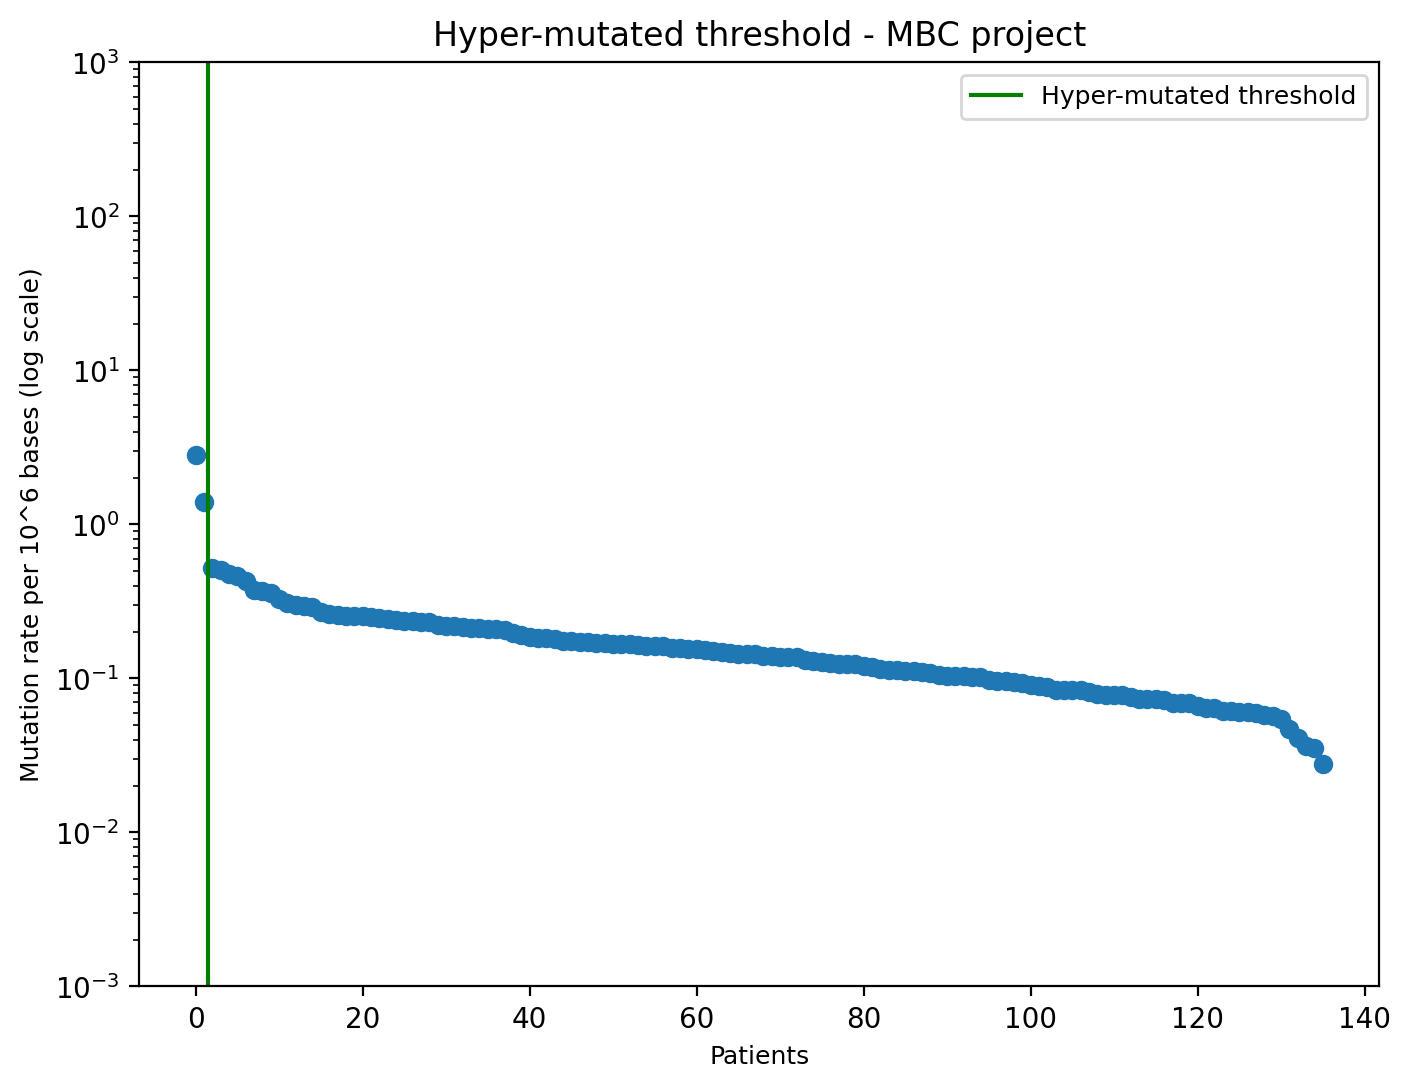

In [116]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.yscale("log") 
#set axes limit
plt.ylim(0.001, 1000)
plt.scatter(patients_TOTAL_ductal, mutation_rate_TOTAL_ductal)
#plt.axhline(y=0.9, color='red', linestyle='-', label='Hyper-mutated threshold')
plt.axvline(x=1.47, color='green', linestyle='-', label='Hyper-mutated threshold')
plt.xlabel("Patients", fontsize=9)
plt.ylabel("Mutation rate per 10^6 bases (log scale)", fontsize=9)
plt.title("Hyper-mutated threshold - MBC project", fontsize=12)
plt.legend(fontsize=9)
plt.show()

(0.2535315891971762, 2.817961156483446)

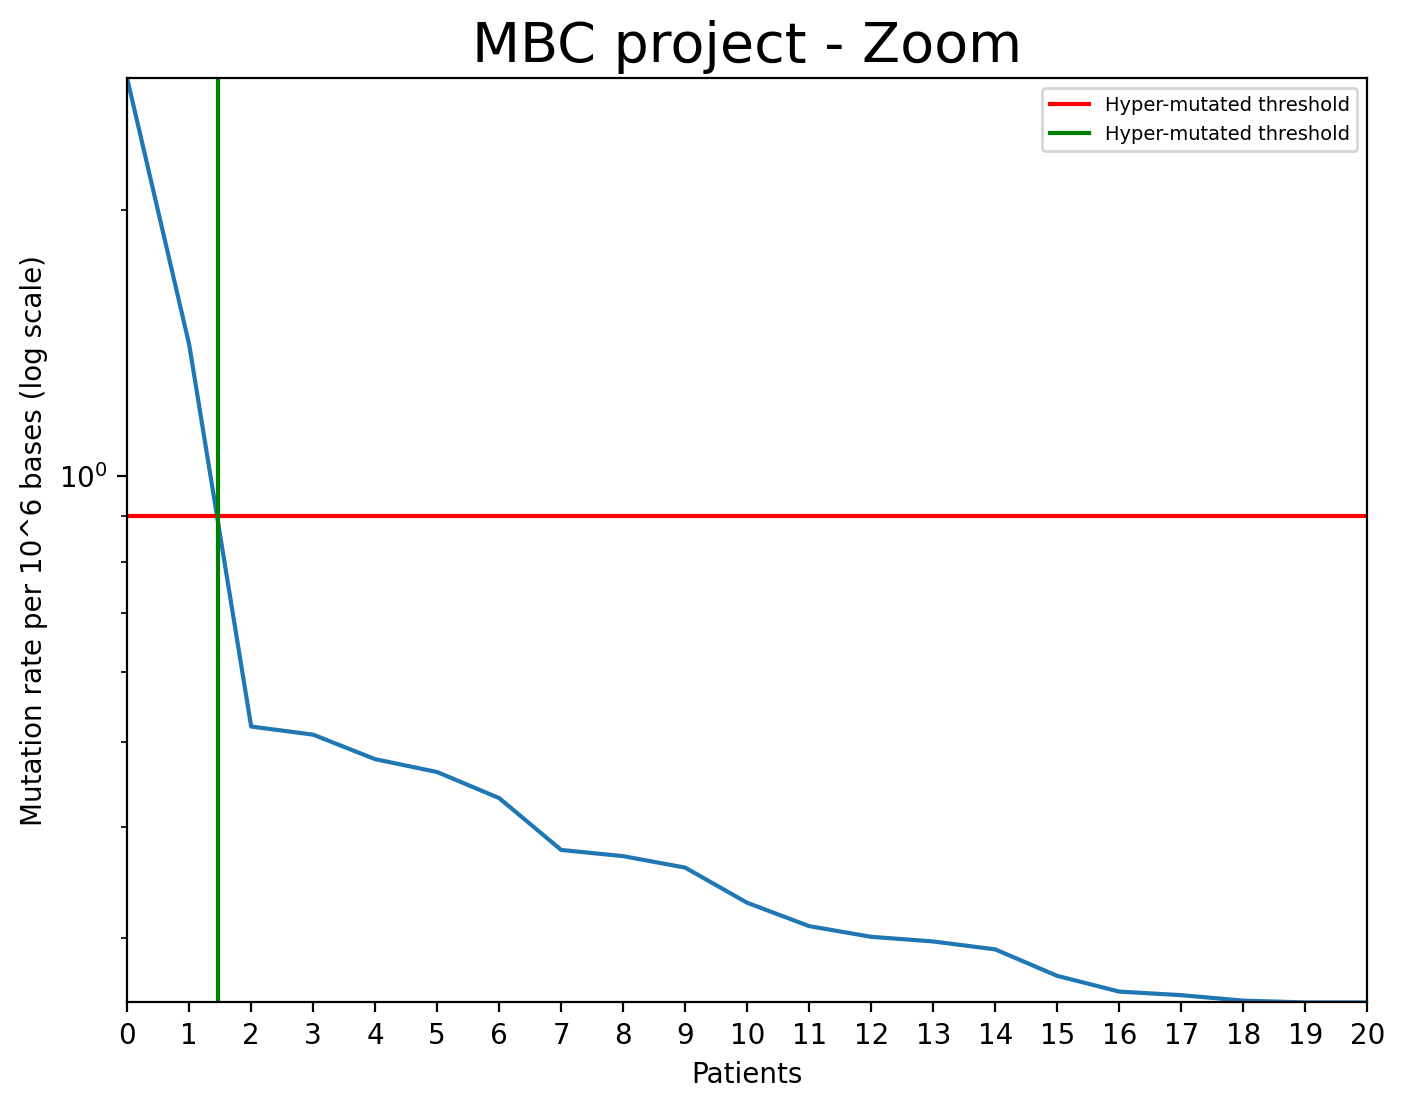

In [117]:
%matplotlib inline
fig = plt.figure(figsize=(8, 6))
plt.plot(patients_TOTAL_ductal, mutation_rate_TOTAL_ductal)
plt.xticks(np.arange(min(patients_TOTAL_ductal), max(patients_TOTAL_ductal)+1, 1.0))
plt.yscale("log")
plt.xlabel("Patients")
plt.ylabel("Mutation rate per 10^6 bases (log scale)")
plt.title ("MBC project - Zoom",fontsize=20)
#plt.axvline(x=x_max_MBC+1, color='red', linestyle='-')
x1_MBC, y1_MBC = (patients_TOTAL_ductal[0], patient_mutation_rate_TOTAL_ductal.loc[0, 'Mutation_rate*10^6'])
x2_MBC, y2_MBC = (patients_TOTAL_ductal[20], patient_mutation_rate_TOTAL_ductal.loc[20, 'Mutation_rate*10^6'])
plt.axhline(y=0.9, color='red', linestyle='-', label='Hyper-mutated threshold')
plt.axvline(x=1.47, color='green', linestyle='-', label='Hyper-mutated threshold')
plt.legend(loc='upper right', fontsize = 7)
plt.gca().set_xlim(x1_MBC, x2_MBC)
plt.gca().set_ylim(y2_MBC, y1_MBC)

In [118]:
array_mutation_rate_TOTAL_ductal = np.array(mutation_TOTAL_ductal_group_by_pts['Mutation_rate*10^6'])

### Study of the thresholds with KneeLocator

In [119]:
colonne_iper = ['Studio', 'x_max', 'mutation rate x_max', 'x_max+1', 'mutation_rate x_max+1', 'gap']
df_soglia_iper = pd.DataFrame(columns = colonne_iper)

123
dx_3: 122
yx_3: -1.1918383378140305
dx_4: 123
yx_4: -1.2085440313168831
gap_max 0.01670569350285267
dim_finale_x_sx: 122
dim_inizio_y_sx: 14
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121]
[ 0.449935    0.14871801 -0.28365692 -0.29286492 -0.32061799 -0.33518923
 -0.36466421 -0.42335382 -0.43039278 -0.44335776 -0.48314492 -0.50957403
 -0.52166253 -0.52694812 -0.53590297 -0.56586619 -0.58367575 -0.5877346
 -0.59389491 -0.59596792 -0.59596792 -0.59805087 -0.60861817 -0.61291815
 -0.61726113 -0.6260796  -0.6260796  -0.63281298 -0.63508084 -0.6512

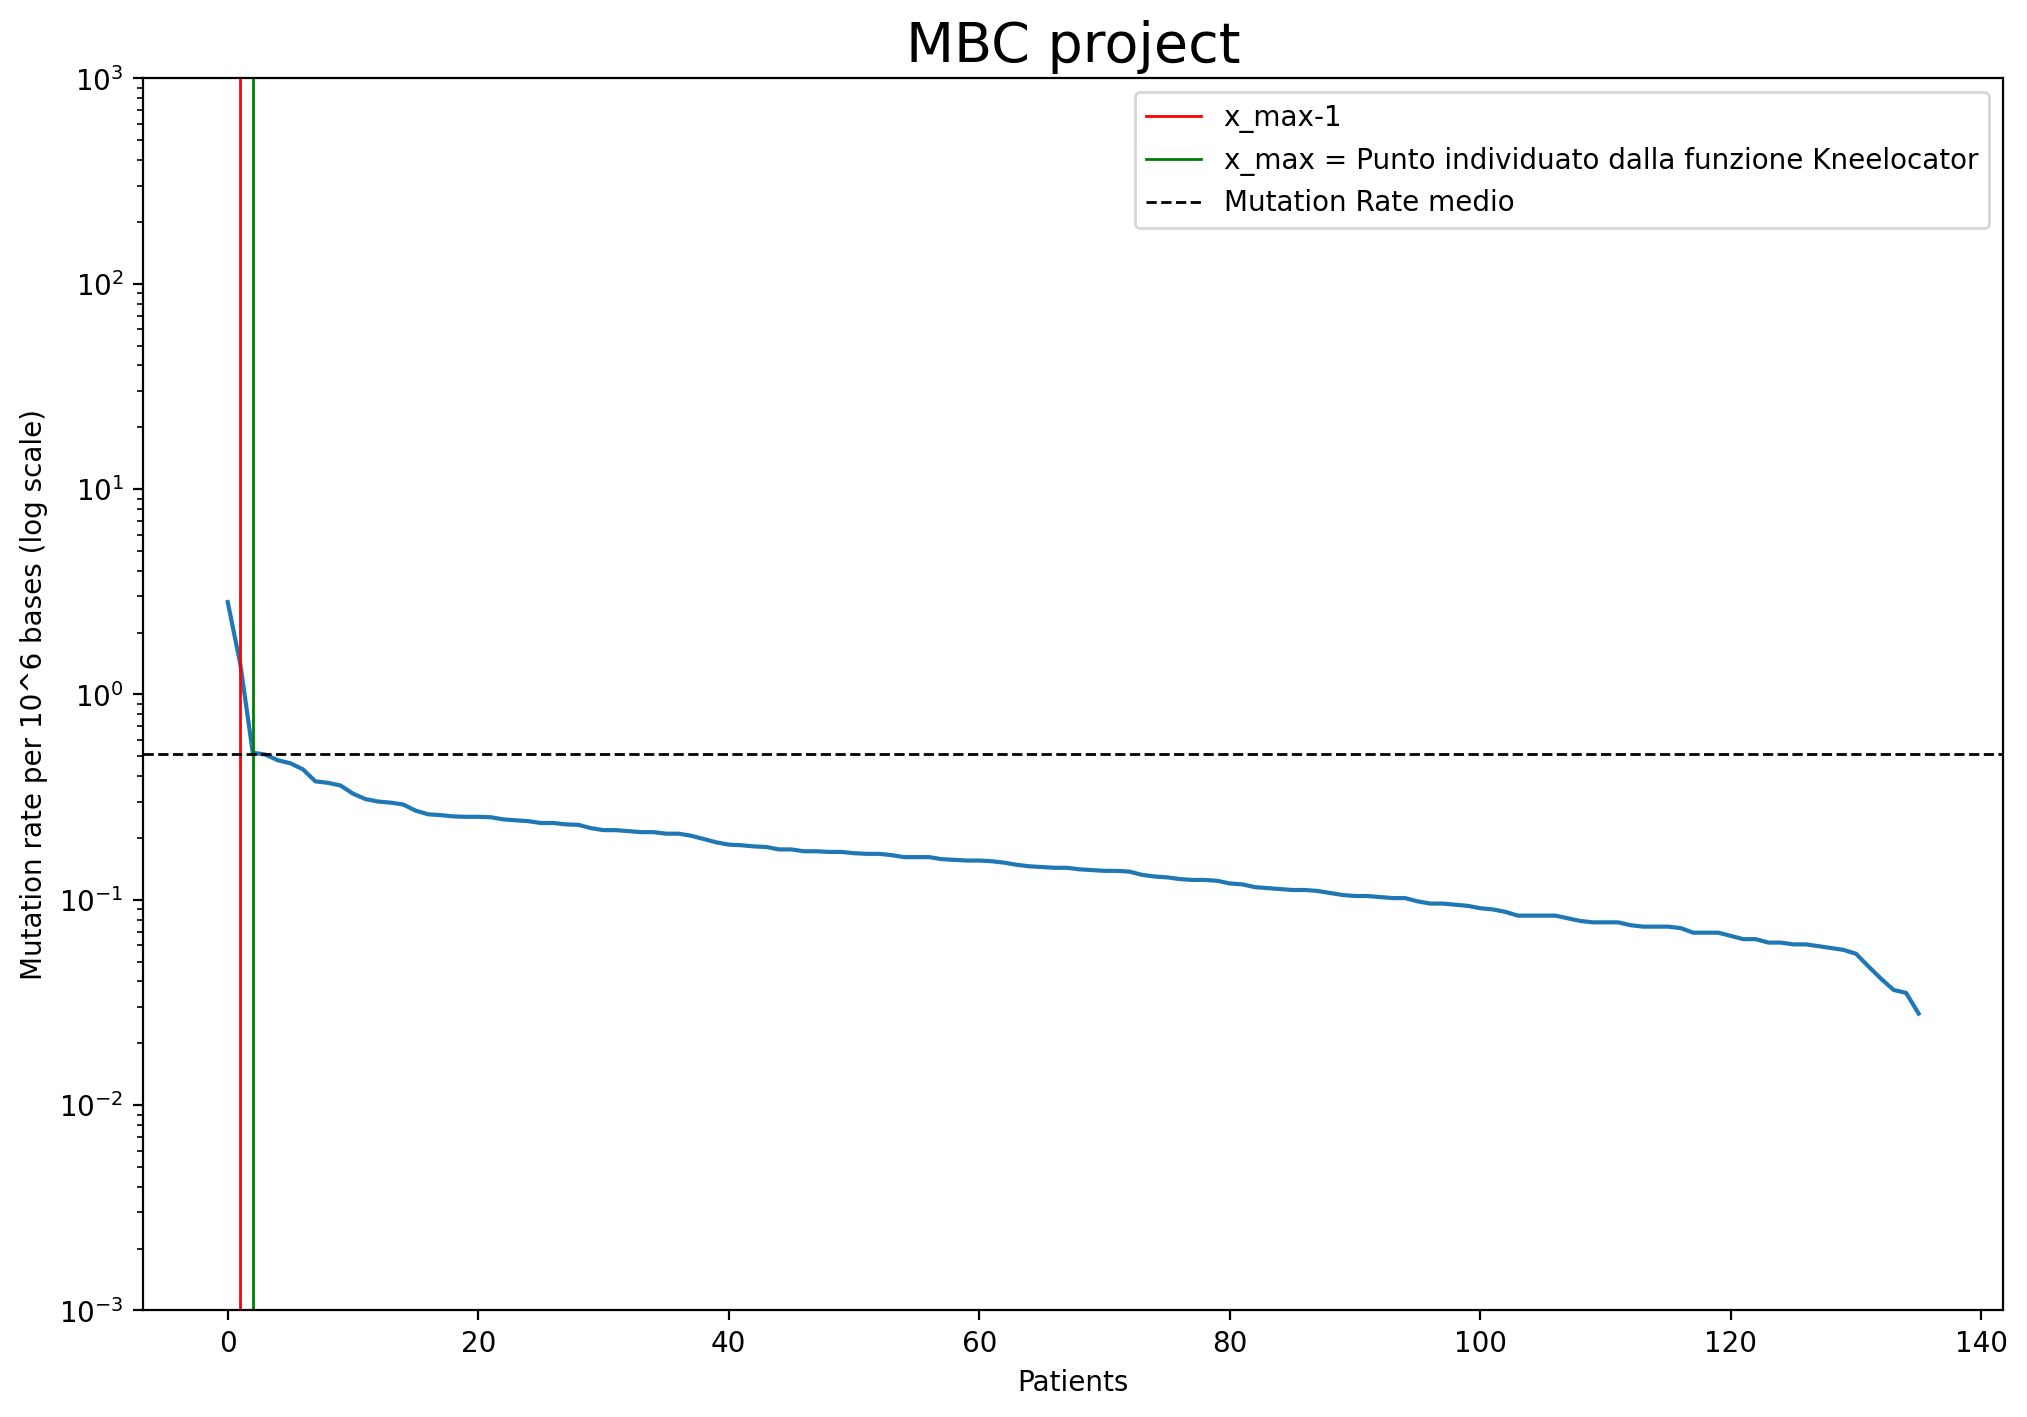

In [120]:
from kneed import KneeLocator, DataGenerator as dg

x_MBC=patients_TOTAL_ductal
y_MBC=np.array(np.log10(mutation_TOTAL_ductal_group_by_pts['Mutation_rate*10^6']))

#punto di destra
kl = KneeLocator(x_MBC, y_MBC, S=0.1, curve="convex", direction="decreasing", online = True)
print(kl.knee)

x4 = kl.knee #primo punto che si trova considerando l'intera curva
y4 = y_MBC[x4]
x3 = kl.knee -1 # x3 è minore di x4; visto che la funzione è decrescente y3 sarà maggiore di y4
y3 = y_MBC[x3]
dim_inizio_x = 0
dim_finale_x = len(x_MBC)
dim_inizio_y = 0
dim_finale_y = len(y_MBC) 

print('dx_3:', x3)   
print('yx_3:', y3)   
print('dx_4:', x4)   
print('yx_4:', y4)   

gap_max_MBC = abs(y4 - y3) # visto che la funzione è decrescente. Il gap si riferisce alla ripidità della curva.
print('gap_max', gap_max_MBC) 
x_max_MBC = x3

dim_finale_x = x3
print('dim_finale_x_sx:', dim_finale_x)   
dim_inizio_y = dim_finale_y - x3    # !! In questo modo, i sub-intervalli considerati sia per x che per y sono uguali
print('dim_inizio_y_sx:', dim_inizio_y)   

x_sub = x_MBC[0:dim_finale_x] 
y_sub = y_MBC[0:x3] 
# x_sub e y_sub hanno la stessa lunghezza

print(x_sub)
print(y_sub)

while (dim_finale_x > 1): # Questo limite (1) può variare in base al dataset
    kl = KneeLocator(x_sub, y_sub, S=0.1, curve="convex", direction="decreasing", online = True)
    print(kl.knee)

    x4 = kl.knee
    y4 = y_MBC[x4]
    x3 = kl.knee - 1
    y3 = y_MBC[x3]

    print('dx_3:', x3)   
    print('yx_3:', y3)
    print('dx_4:', x4)
    print('yx_4:', y4)

    gap = abs(y4 - y3) # essendo la funzione decrescente, se x4 > x3, allora y4 < y3 
    print('gap', gap)

    if gap > gap_max_MBC: # aggiorna il gap massimo!!!
        gap_max_MBC = gap
        print('gap_max:',gap_max_MBC)
        x_max_MBC = x4  # x4 > x3
        print('x:', x_max_MBC)
    

    dim_finale_x = x3
    print('dim_finale_x:', dim_finale_x)
    dim_inizio_y = dim_finale_y - x3
    print('dim_inizio_y:', dim_inizio_y)

    x_sub = x_MBC[0:dim_finale_x]
    y_sub = y_MBC[0:x3]

    print(x_sub)
    print(y_sub)

y_max_MBC_inf = array_mutation_rate_TOTAL_ductal[x_max_MBC+1]
y_max_MBC_sup = array_mutation_rate_TOTAL_ductal[x_max_MBC]
y_max_MBC_avg = (y_max_MBC_inf + y_max_MBC_sup)/2
y_grafico_media = (y_MBC[x_max_MBC]+y_MBC[x_max_MBC-1])/2
print('gap_max:',gap_max_MBC)
print('x:',x_max_MBC)
print('mutation rate inf:', y_max_MBC_inf)
print('mutation rate sup:', y_max_MBC_sup)
print('mutation rate avg:', y_max_MBC_avg)
fig = plt.figure(figsize=(12, 8))
plt.plot(patients_TOTAL_ductal, mutation_rate_TOTAL_ductal)
plt.yscale("log")
plt.xlabel("Patients")
plt.ylabel("Mutation rate per 10^6 bases (log scale)")
plt.title ("MBC project",fontsize=20)
plt.axvline(x=x_max_MBC-1, color='red', linestyle='-', linewidth = 1,  label = 'x_max-1')
plt.axvline(x=x_max_MBC, color='green', linestyle='-', linewidth = 1, label = 'x_max = Punto individuato dalla funzione Kneelocator')
plt.axhline(y=y_max_MBC_avg, color='black', linestyle='--', linewidth = 1, label = 'Mutation Rate medio')
plt.legend()
#set axes limit
plt.ylim(0.001, 1000)
plt.show()

#'Studio', 'x_max', 'mutation rate x_max', 'x_max+1', 'mutation_rate x_max+1', 'gap'
#df_soglia_iper = df_soglia_iper.append({'Studio': 'MBC project', 'x_max': x_max_MBC, 'mutation rate x_max':y_max_MBC_sup,  'x_max+1': x_max_MBC+1, 'mutation_rate x_max+1': y_max_MBC_inf,'gap': gap_max_MBC }, ignore_index=True)

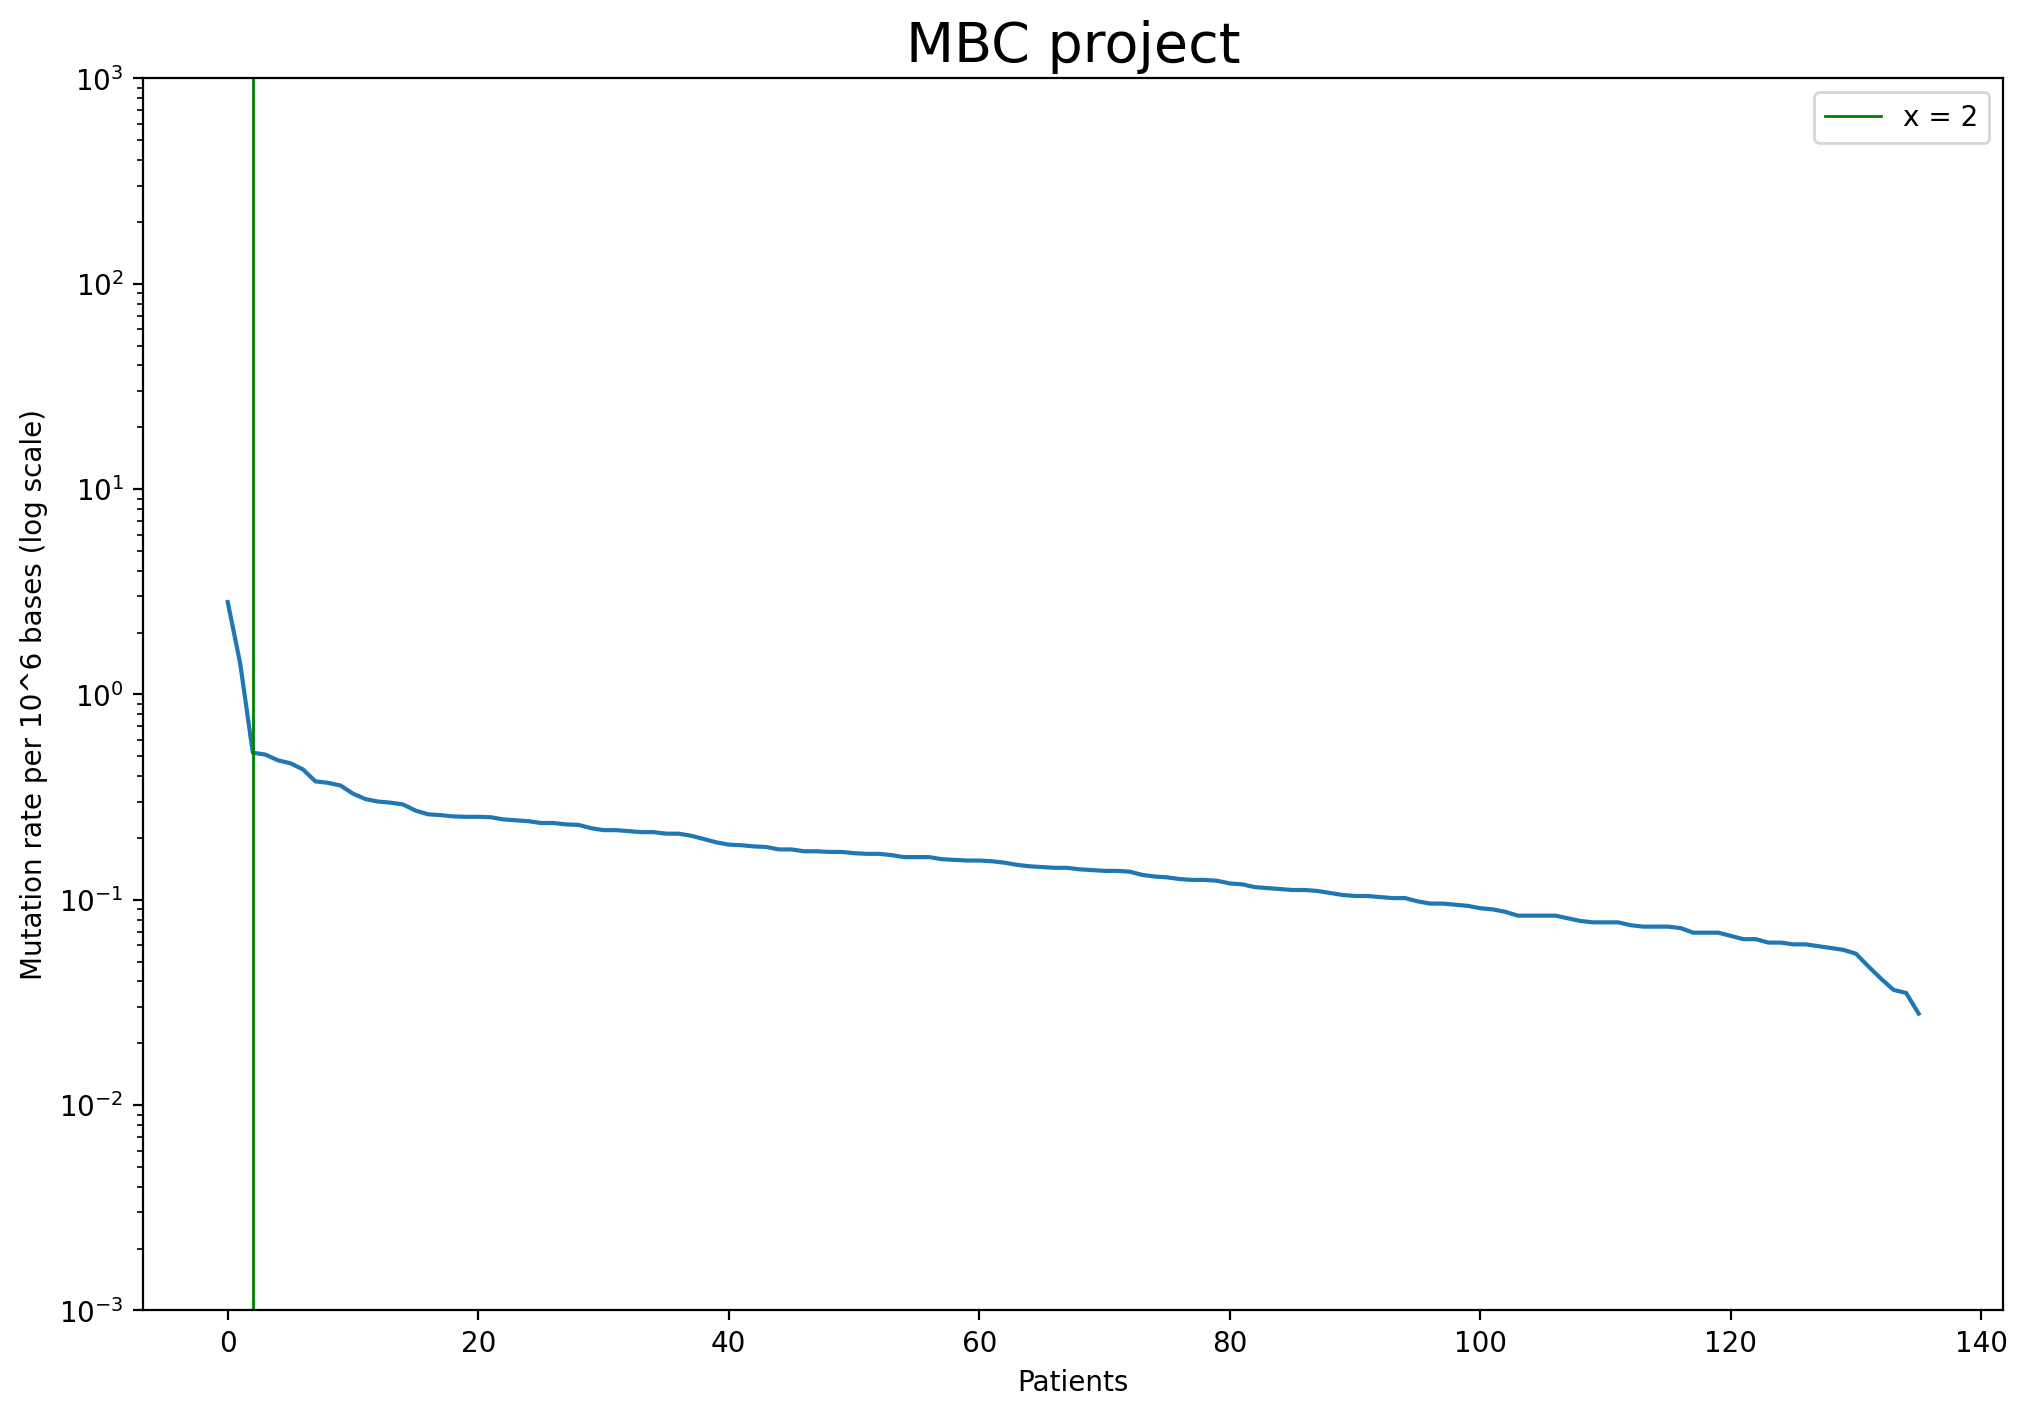

In [121]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.yscale("log") 
#set axes limit
plt.ylim(0.001, 1000)
plt.plot(patients_TOTAL_ductal, mutation_rate_TOTAL_ductal)
plt.xlabel("Patients")
plt.ylabel("Mutation rate per 10^6 bases (log scale)")
plt.axvline(x=2, color='green', linestyle='-', linewidth = 1, label='x = 2')
plt.title ("MBC project",fontsize=20)
plt.legend()
plt.show()

## Zoom

(0.2535315891971762, 2.817961156483446)

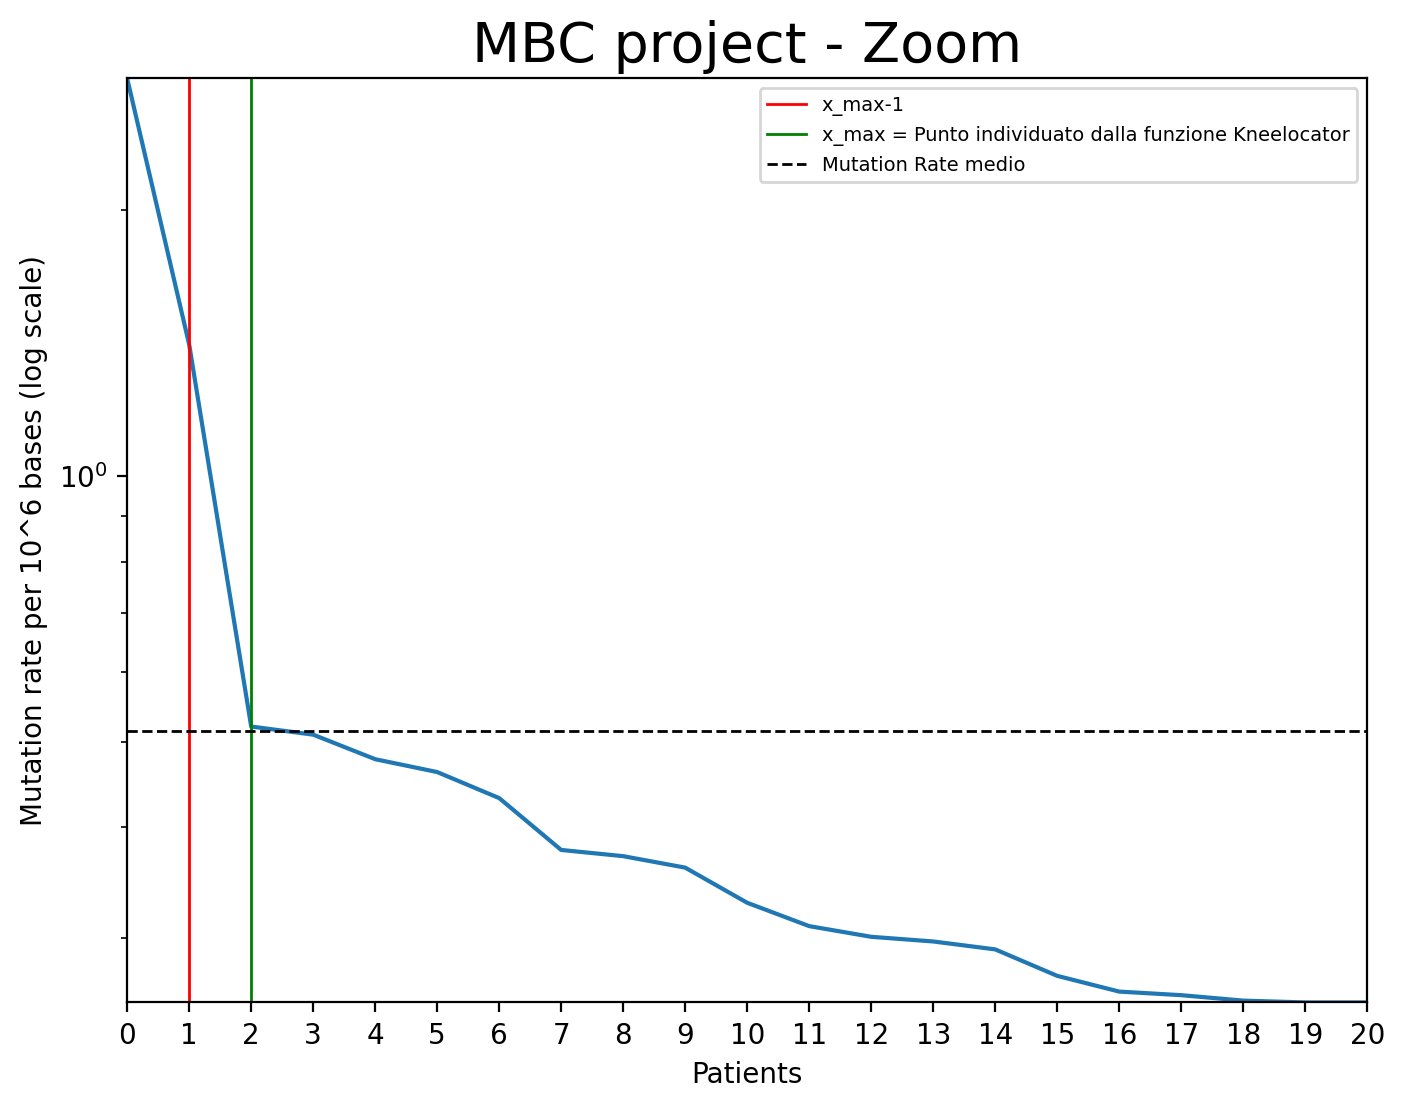

In [122]:
%matplotlib inline
fig = plt.figure(figsize=(8, 6))
plt.plot(patients_TOTAL_ductal, mutation_rate_TOTAL_ductal)
plt.xticks(np.arange(min(patients_TOTAL_ductal), max(patients_TOTAL_ductal)+1, 1.0))
plt.yscale("log")
plt.xlabel("Patients")
plt.ylabel("Mutation rate per 10^6 bases (log scale)")
plt.title ("MBC project - Zoom",fontsize=20)
#plt.axvline(x=x_max_MBC+1, color='red', linestyle='-')
x1_MBC, y1_MBC = (patients_TOTAL_ductal[0], patient_mutation_rate_TOTAL_ductal.loc[0, 'Mutation_rate*10^6'])
x2_MBC, y2_MBC = (patients_TOTAL_ductal[20], patient_mutation_rate_TOTAL_ductal.loc[20, 'Mutation_rate*10^6'])
plt.axvline(x=x_max_MBC-1, color='red', linestyle='-', linewidth = 1,  label = 'x_max-1')
plt.axvline(x=x_max_MBC, color='green', linestyle='-', linewidth = 1, label = 'x_max = Punto individuato dalla funzione Kneelocator')
plt.axhline(y=y_max_MBC_avg, color='black', linestyle='--', linewidth = 1, label = 'Mutation Rate medio')
plt.legend(loc='upper right', fontsize = 7)
plt.gca().set_xlim(x1_MBC, x2_MBC)
plt.gca().set_ylim(y2_MBC, y1_MBC)

In [123]:
# create a table containing the iterated values: x3, y3, x4, y4, gap. For each row, one iteration.

x_MBC=patients_TOTAL_ductal
y_MBC=np.array(np.log10(mutation_TOTAL_ductal_group_by_pts['Mutation_rate*10^6']))

#punto di destra
kl = KneeLocator(x_MBC, y_MBC, S=0.1, curve="convex", direction="decreasing", online = True)

x4 = kl.knee #primo punto che si trova considerando l'intera curva
y4 = y_MBC[x4]
x3 = kl.knee -1 # x3 è minore di x4; visto che la funzione è decrescente y3 sarà maggiore di y4
y3 = y_MBC[x3]
dim_inizio_x = 0
dim_finale_x = len(x_MBC) #164
dim_inizio_y = 0
dim_finale_y = len(x_MBC) #164

gap_MBC = abs(y4 - y3) # visto che la funzione è decrescente. Il gap si riferisce alla ripidità della curva.
x_max_MBC = x3

data = [[x4, y4, x3, y3, gap_MBC]] # inizializzo data con il primo risultato di Kneelocator

dim_finale_x = x3
dim_inizio_y = dim_finale_y - x3 # !! In questo modo, i sub-intervalli considerati sia per x che per y sono uguali

x_sub = x_MBC[0:dim_finale_x] # da 0 a 156 --> 156 = lunghezza del vettore
y_sub = y_MBC[0:x3] # da 8 a 164 --> 156 = lunghezza del vettore
# x_sub e y_sub hanno la stessa lunghezza

while (dim_finale_x > 1): # Questo limite (1) può variare in base al dataset
    kl = KneeLocator(x_sub, y_sub, S=0.1, curve="convex", direction="decreasing", online = True)
    
    x4 = kl.knee
    y4 = y_MBC[x4]
    x3 = kl.knee - 1
    y3 = y_MBC[x3]
    gap = abs(y4 - y3) # essendo la funzione decrescente, se x4 > x3, allora y4 < y3 

    data.append([x4, y4, x3, y3, gap])
  
    dim_finale_x = x3
    dim_inizio_y = dim_finale_y - x3
    dim_finale_y = x3
   
    x_sub = x_MBC[0:x3]
    y_sub = y_MBC[0:x3]
    
cols=['x4','y4','x3','y3','gap']
result_KneeLocator = pd.DataFrame(data, columns=cols)  
result_KneeLocator

,x4,y4,x3,y3,gap
0,123,-1.208544,122,-1.191838,0.016706
1,117,-1.160239,116,-1.137963,0.022276
2,112,-1.123723,111,-1.109934,0.013788
3,103,-1.077265,102,-1.058782,0.018483
4,95,-1.007629,94,-0.991835,0.015794
5,73,-0.878688,72,-0.863036,0.015652
6,15,-0.565866,14,-0.535903,0.029963
7,2,-0.283657,1,0.148718,0.432375


In [124]:
# save the dataset 
result_KneeLocator.to_csv('Points_foundbyKneeLocator_MBC.csv', index=False, sep=',')

### Mutation Frequency analysis

In [125]:
genes_patients_TOTAL_ductal=data_mutation_TOTAL_ductal[['PATIENT_ID', 'Hugo_Symbol']]

In [126]:
genes_patients_TOTAL_ductal=genes_patients_TOTAL_ductal.drop_duplicates()

In [127]:
n_of_pts_per_gene_TOTAL_ductal= genes_patients_TOTAL_ductal.groupby(['Hugo_Symbol'])['PATIENT_ID'].count().reset_index()
n_of_pts_per_gene_TOTAL_ductal.rename(columns = {'PATIENT_ID':'Num_pts_per_gene'}, inplace = True)

In [128]:
tot_pts_TOTAL_ductal = 136 

In [129]:
# add a column to the n_of_pts_per_gene dataframe representing the mutation frequency for each gene
n_of_pts_per_gene_TOTAL_ductal["Mutation_frequency (%)"] = (n_of_pts_per_gene_TOTAL_ductal["Num_pts_per_gene"]*100)/tot_pts_TOTAL_ductal

In [130]:
# the numbers of patients per gene are sorted in descending order
n_of_pts_per_gene_TOTAL_ductal= n_of_pts_per_gene_TOTAL_ductal.sort_values(by="Num_pts_per_gene", ascending=False)

In [131]:
gene_mutation_frequency_TOTAL_ductal = n_of_pts_per_gene_TOTAL_ductal[['Hugo_Symbol', 'Mutation_frequency (%)']]

In [132]:
# select the first 50 genes
highest_mutated_genes_TOTAL_ductal=gene_mutation_frequency_TOTAL_ductal.head(50)

In [133]:
mutated_gene_names=highest_mutated_genes_TOTAL_ductal['Hugo_Symbol'].tolist()

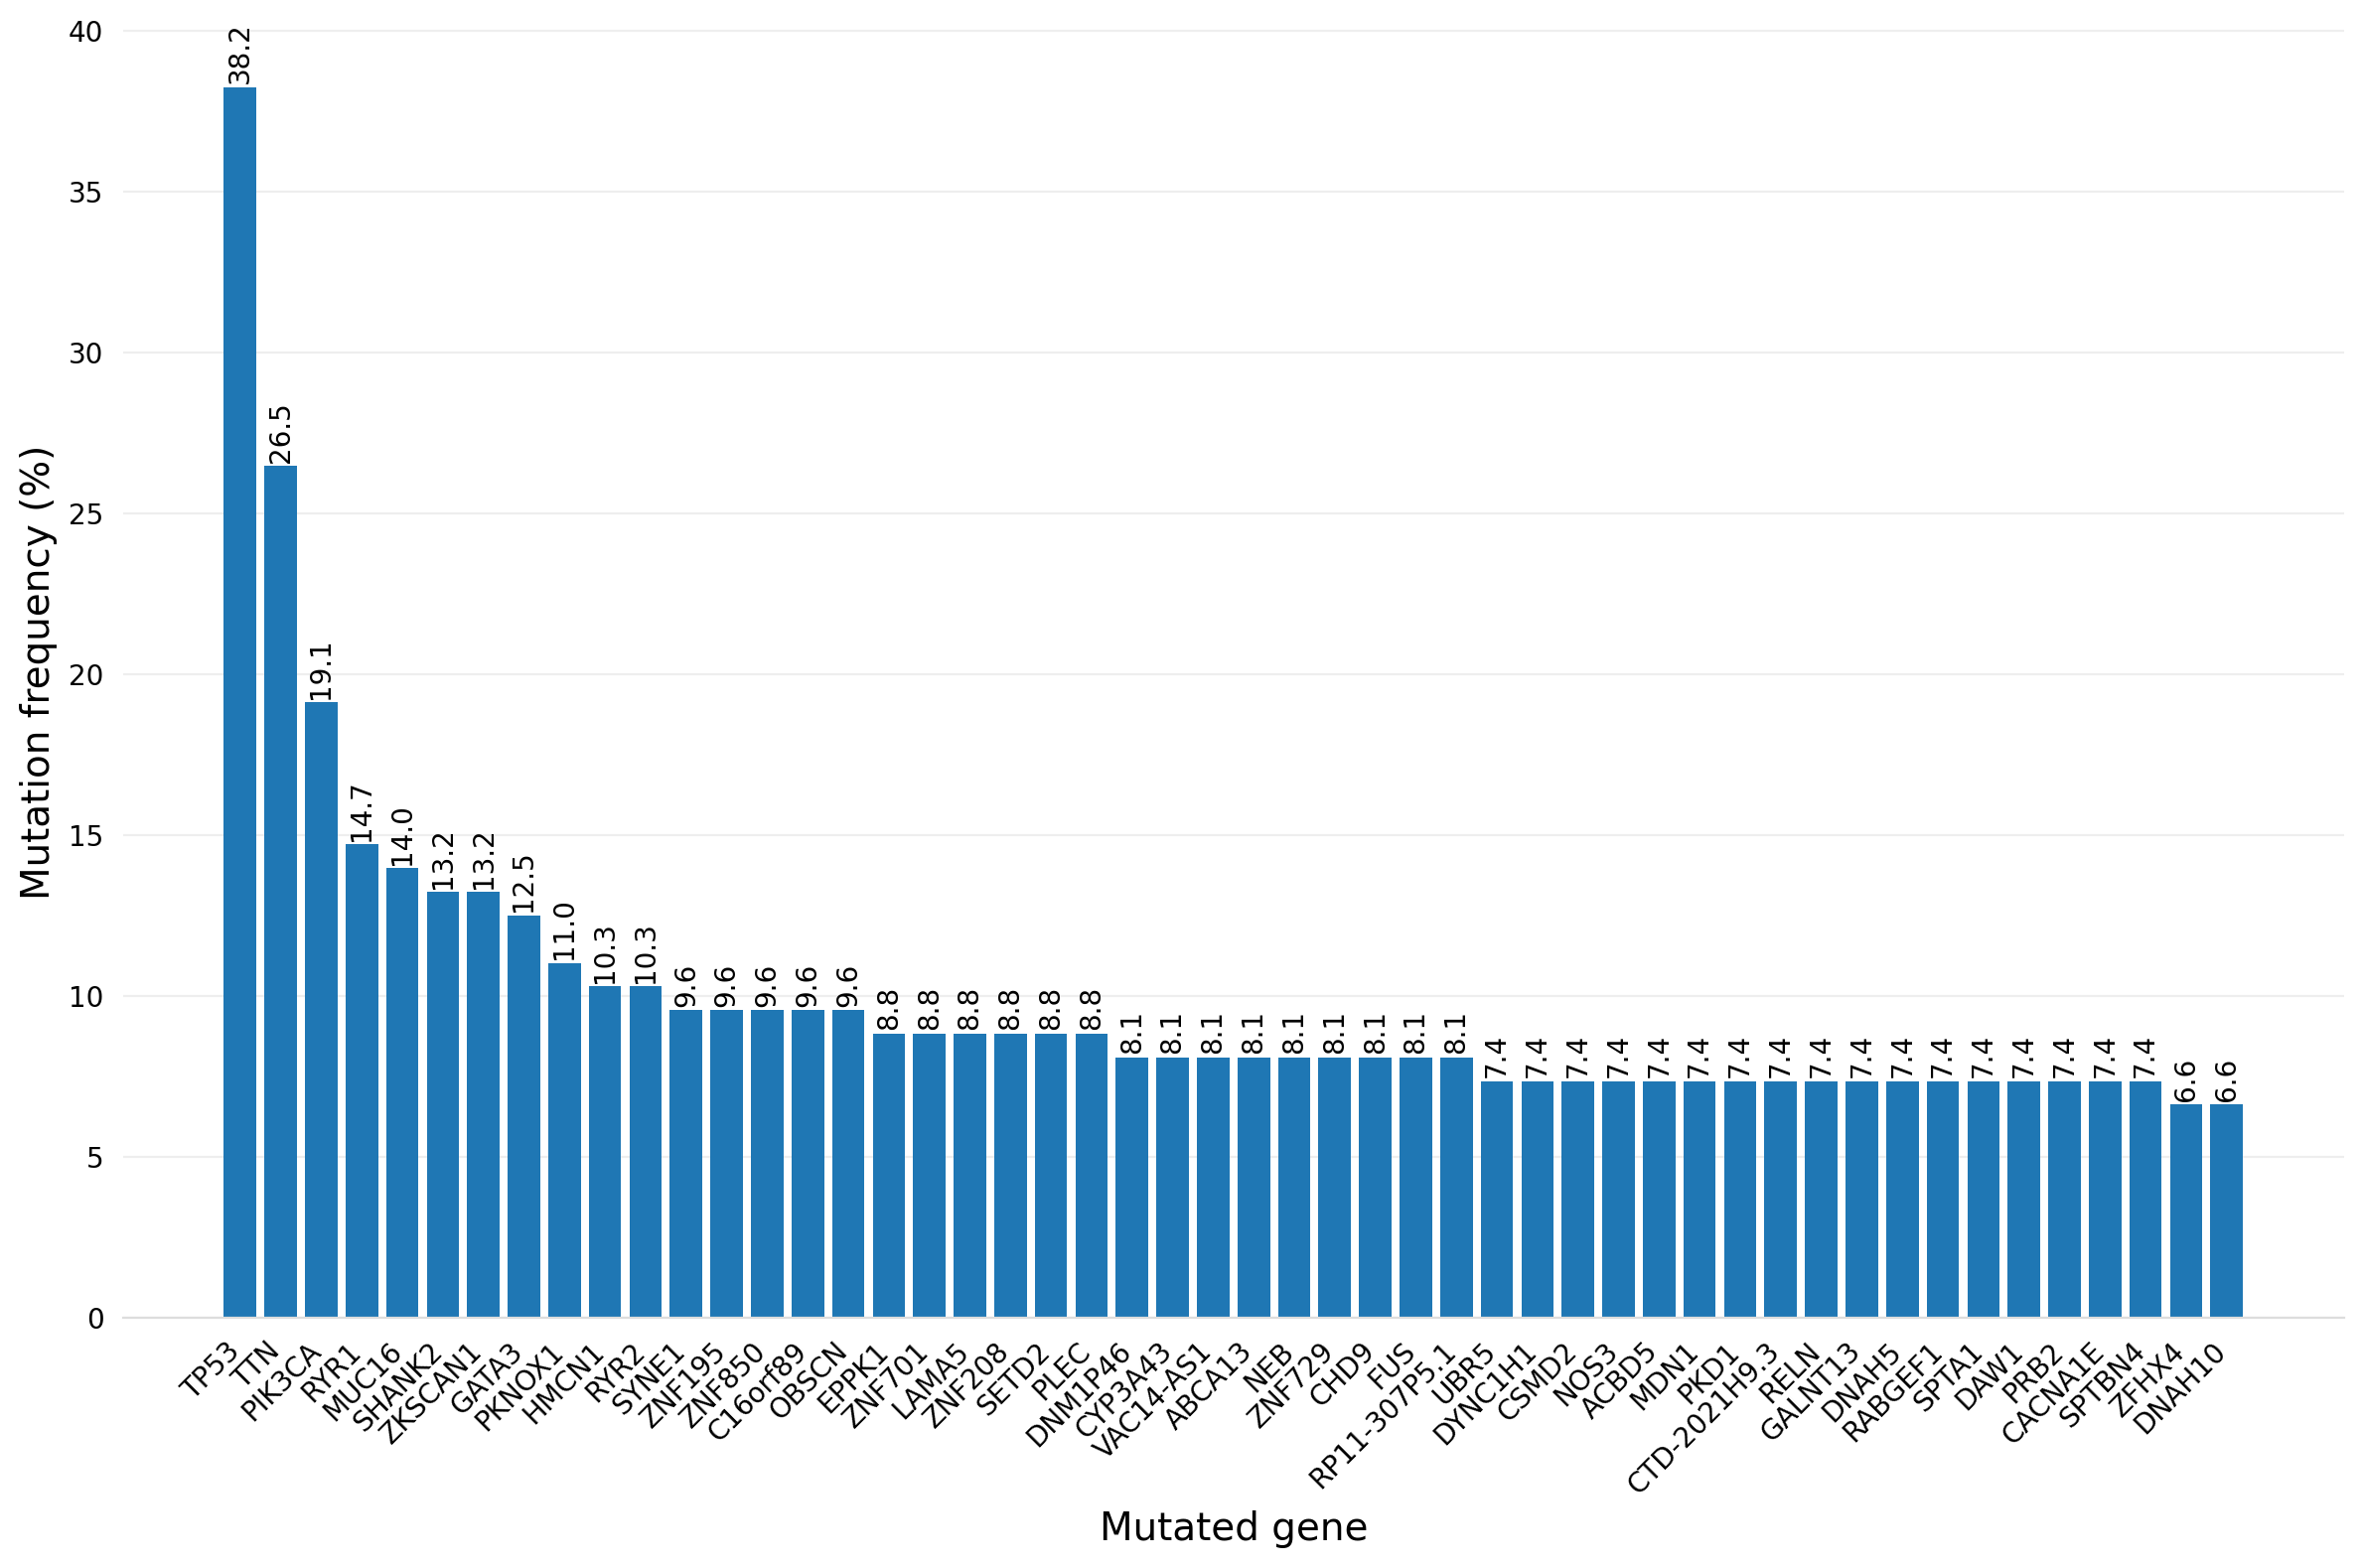

In [134]:
# increase the quality and resolution of the chart
from IPython.display import set_matplotlib_formats
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
# set default figure size.
# set default figure size.
plt.rcParams['figure.figsize'] = (12, 8)
fig, ax = plt.subplots()
h=ax.bar(highest_mutated_genes_TOTAL_ductal['Hugo_Symbol'], highest_mutated_genes_TOTAL_ductal['Mutation_frequency (%)'], label=mutated_gene_names)
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]

_ = plt.xticks(xticks_pos, mutated_gene_names,  ha='right', rotation=45)
#plt.title('Highest mutated genes', fontsize=14)
plt.xlabel('Mutated gene', fontsize=14)
plt.ylabel('Mutation frequency (%)', fontsize=14)


# First, let's remove the top, right and left spines (figure borders)
# which really aren't necessary for a bar chart.
# Also, make the bottom spine gray instead of black.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)

# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add text annotations to the top of the bars.
# Note, you'll have to adjust this slightly (the 0.3)
# with different data.
for bar in h:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.3,
      round(bar.get_height(), 1),
      rotation='vertical',
      horizontalalignment='center'
  )


fig.tight_layout()

# DUCTAL and TRIPLE-NEGATIVE 

### Mutation Rate analysis

In [135]:
data_mutation_ductal_TN=pd.read_csv('mutation_table_MBCproject_TN_and_ductal.csv', sep=None, engine='python')
# delete the first column, that shows the number of each row
data_mutation_ductal_TN = data_mutation_ductal_TN.iloc[:, 1:]

In [136]:
# check if there are duplicate rows 
data_mutation_ductal_TN.duplicated().sum()

0

In [137]:
data_mutation_ductal_TN['PATIENT_ID'].nunique()

18

In [138]:
data_mutation_ductal_TN['Tumor_Sample_Barcode'].nunique()

18

In [139]:
# add a column to the dataset representing the mutated bases length (End_Position-Start_Position+1)
data_mutation_ductal_TN.loc[:, 'Mutation_length'] = data_mutation_ductal_TN['End_Position']-data_mutation_ductal_TN['Start_Position']+1

In [140]:
# extract PATIENT_ID and Mutation_length
pts_mutation_length_ductal_TN = data_mutation_ductal_TN[['PATIENT_ID', 'Mutation_length']]

In [141]:
# group by PATIENT_ID and sum the mutation lengths for each pts
mutation_ductal_TN_group_by_pts=pts_mutation_length_ductal_TN.groupby(['PATIENT_ID'])['Mutation_length'].sum().reset_index()
mutation_ductal_TN_group_by_pts.rename(columns = {'Mutation_length':'Total_sum_mutated_bases'}, inplace = True)

In [142]:
# extract Hugo_Symbol and Gene_length
gene_length_for_each_mutation_ductal_TN = data_mutation_ductal_TN[['Hugo_Symbol', 'Gene_length']]

In [143]:
# look at the number of distinct genes
gene_length_for_each_mutation_ductal_TN['Hugo_Symbol'].nunique()

2298

In the dataset there are 2298 distinct genes. 

In [144]:
# group by gene (Hugo_Symbol) 
mutation_ductal_TN_group_by_gene=gene_length_for_each_mutation_ductal_TN.groupby(['Hugo_Symbol'])['Gene_length'].max().reset_index()

In [145]:
# compute the total gene length (for all the genes in the dataset)
total_GeneLength_ductal_TN = mutation_ductal_TN_group_by_gene['Gene_length'].sum()

In [146]:
# add a column to the dataset representing the mutation rate for each patient (Mutation_rate= Mutation_length/total_gene_length)
mutation_ductal_TN_group_by_pts["Mutation_rate"] = mutation_ductal_TN_group_by_pts["Total_sum_mutated_bases"]/total_GeneLength_ductal_TN

In [147]:
# multiply the Mutation_rate values for 10^6
mutation_ductal_TN_group_by_pts["Mutation_rate*10^6"] = mutation_ductal_TN_group_by_pts["Mutation_rate"]*1000000

In [148]:
# the PATIENT_IDs are sorted for descending order of mutation rate 
mutation_ductal_TN_group_by_pts= mutation_ductal_TN_group_by_pts.sort_values(by="Mutation_rate", ascending=False)

In [149]:
patient_mutation_rate_ductal_TN=mutation_ductal_TN_group_by_pts[['PATIENT_ID', 'Mutation_rate*10^6' ]]

In [150]:
patients=np.arange(0,18,1)
# convert a series into a Numpy array
mutation_rate=mutation_ductal_TN_group_by_pts[['Mutation_rate*10^6']].to_numpy()

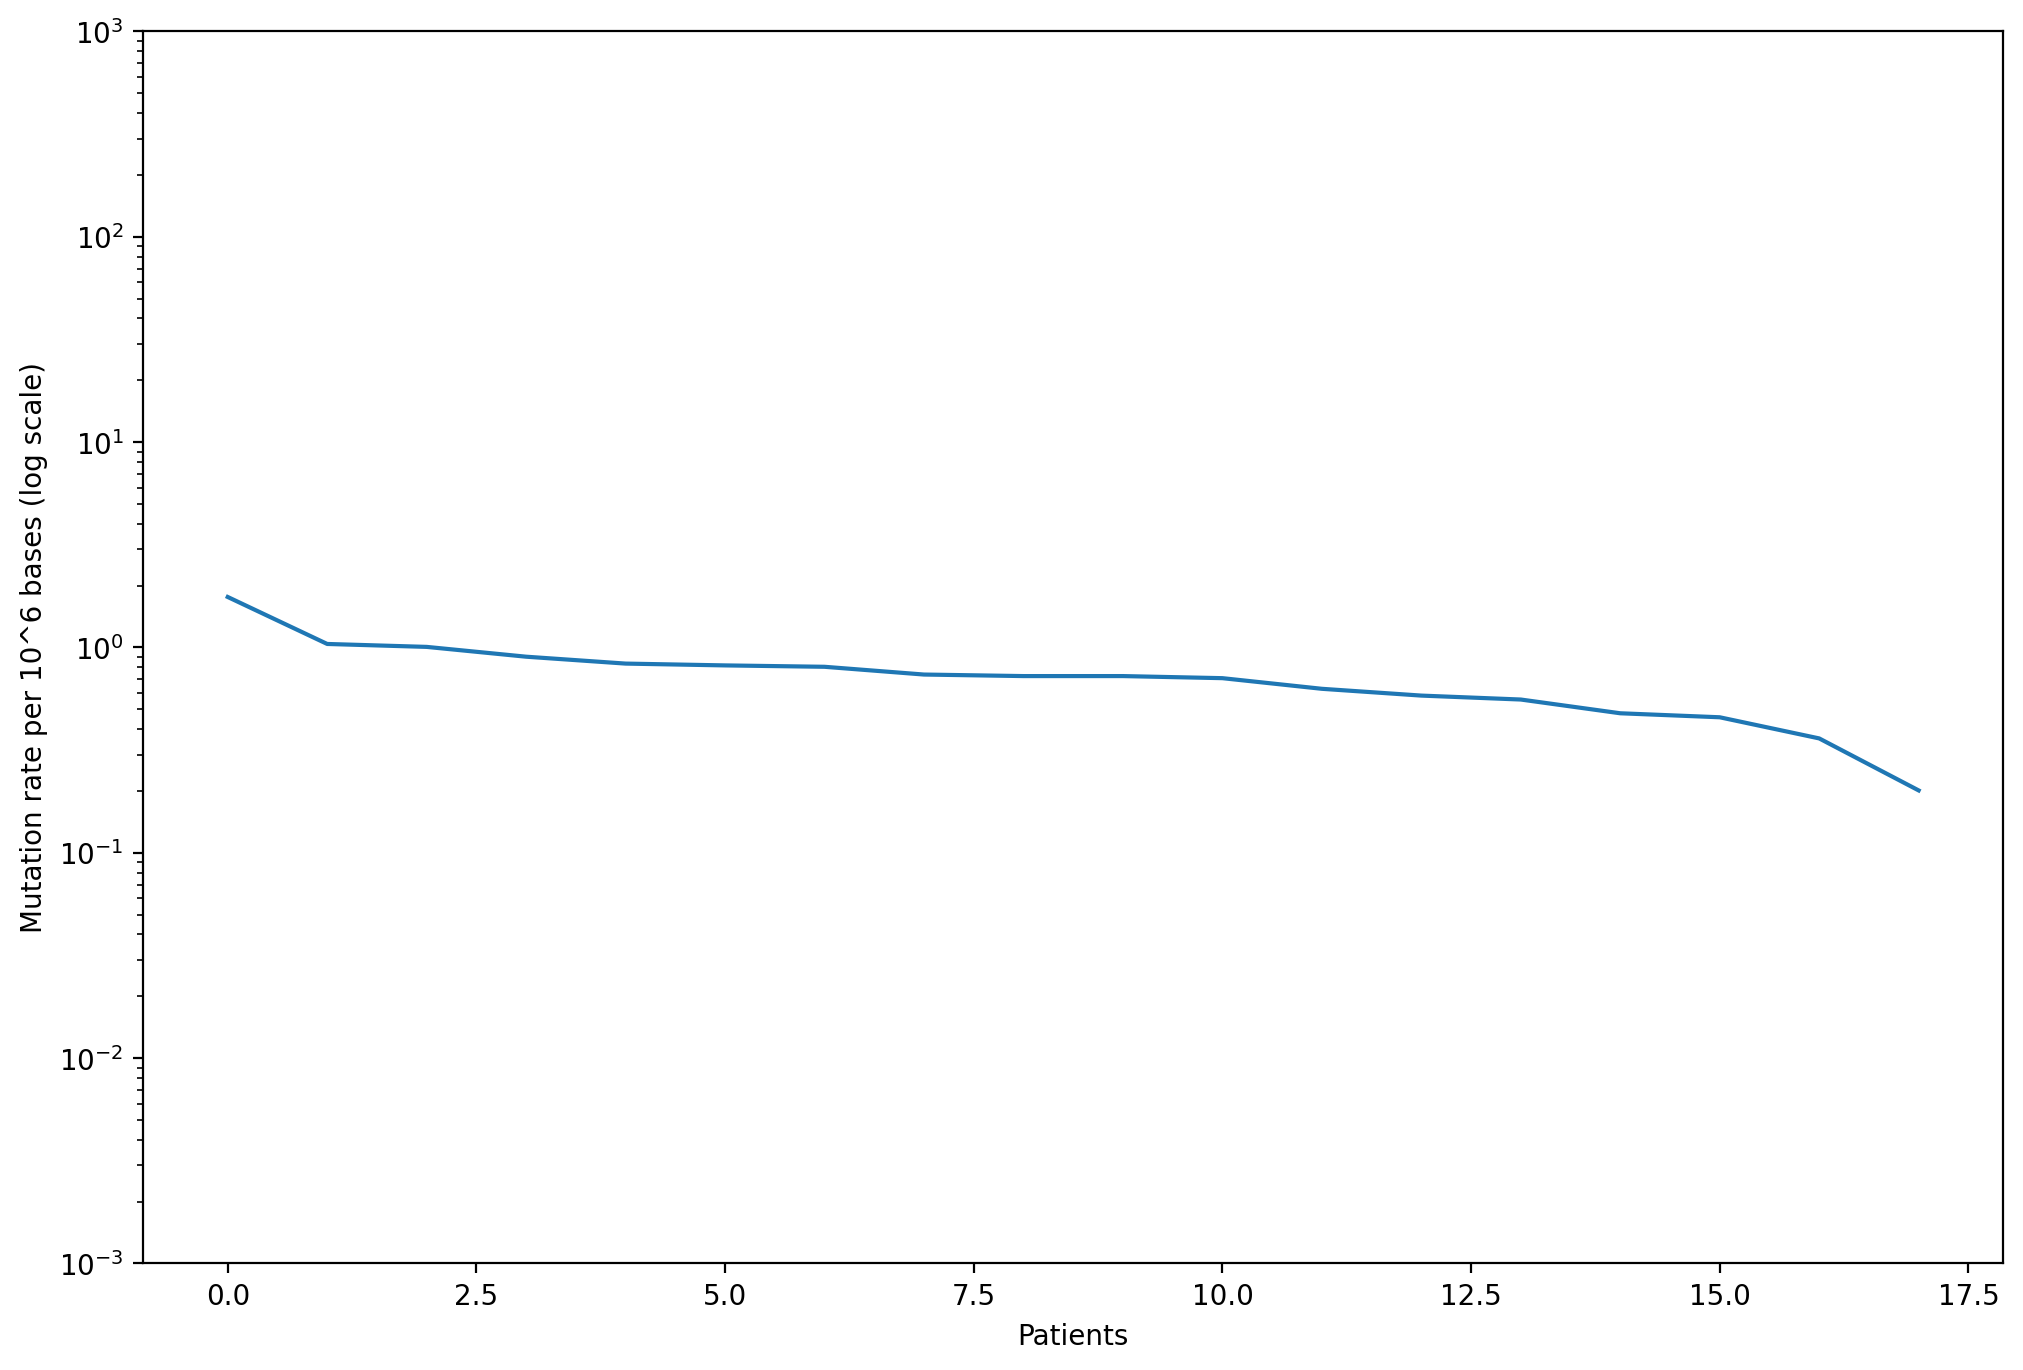

In [151]:
%matplotlib inline
# set default figure size.
plt.rcParams['figure.figsize'] = (12, 8)
plt.yscale("log") 
#set axes limit
plt.ylim(0.001, 1000)
plt.plot(patients, mutation_rate)
plt.xlabel("Patients")
plt.ylabel("Mutation rate per 10^6 bases (log scale)")
plt.show()

### Mutation Frequency analysis

In [152]:
genes_patients_ductal_TN=data_mutation_ductal_TN[['PATIENT_ID', 'Hugo_Symbol']]

In [153]:
genes_patients_ductal_TN=genes_patients_ductal_TN.drop_duplicates()

In [154]:
n_of_pts_per_gene_ductal_TN= genes_patients_ductal_TN.groupby(['Hugo_Symbol'])['PATIENT_ID'].count().reset_index()
n_of_pts_per_gene_ductal_TN.rename(columns = {'PATIENT_ID':'Num_pts_per_gene'}, inplace = True)

In [155]:
tot_pts_ductal_TN = 18

In [156]:
# add a column to the n_of_pts_per_gene dataframe representing the mutation frequency for each gene
n_of_pts_per_gene_ductal_TN["Mutation_frequency (%)"] = (n_of_pts_per_gene_ductal_TN["Num_pts_per_gene"]*100)/tot_pts_ductal_TN

In [157]:
# the numbers of patients per gene are sorted in descending order
n_of_pts_per_gene_ductal_TN= n_of_pts_per_gene_ductal_TN.sort_values(by="Num_pts_per_gene", ascending=False)

In [158]:
gene_mutation_frequency_ductal_TN = n_of_pts_per_gene_ductal_TN[['Hugo_Symbol', 'Mutation_frequency (%)']]

In [159]:
# select the first 50 genes
highest_mutated_genes_ductal_TN=gene_mutation_frequency_ductal_TN.head(50)

In [160]:
mutated_gene_names=highest_mutated_genes_ductal_TN['Hugo_Symbol'].tolist()

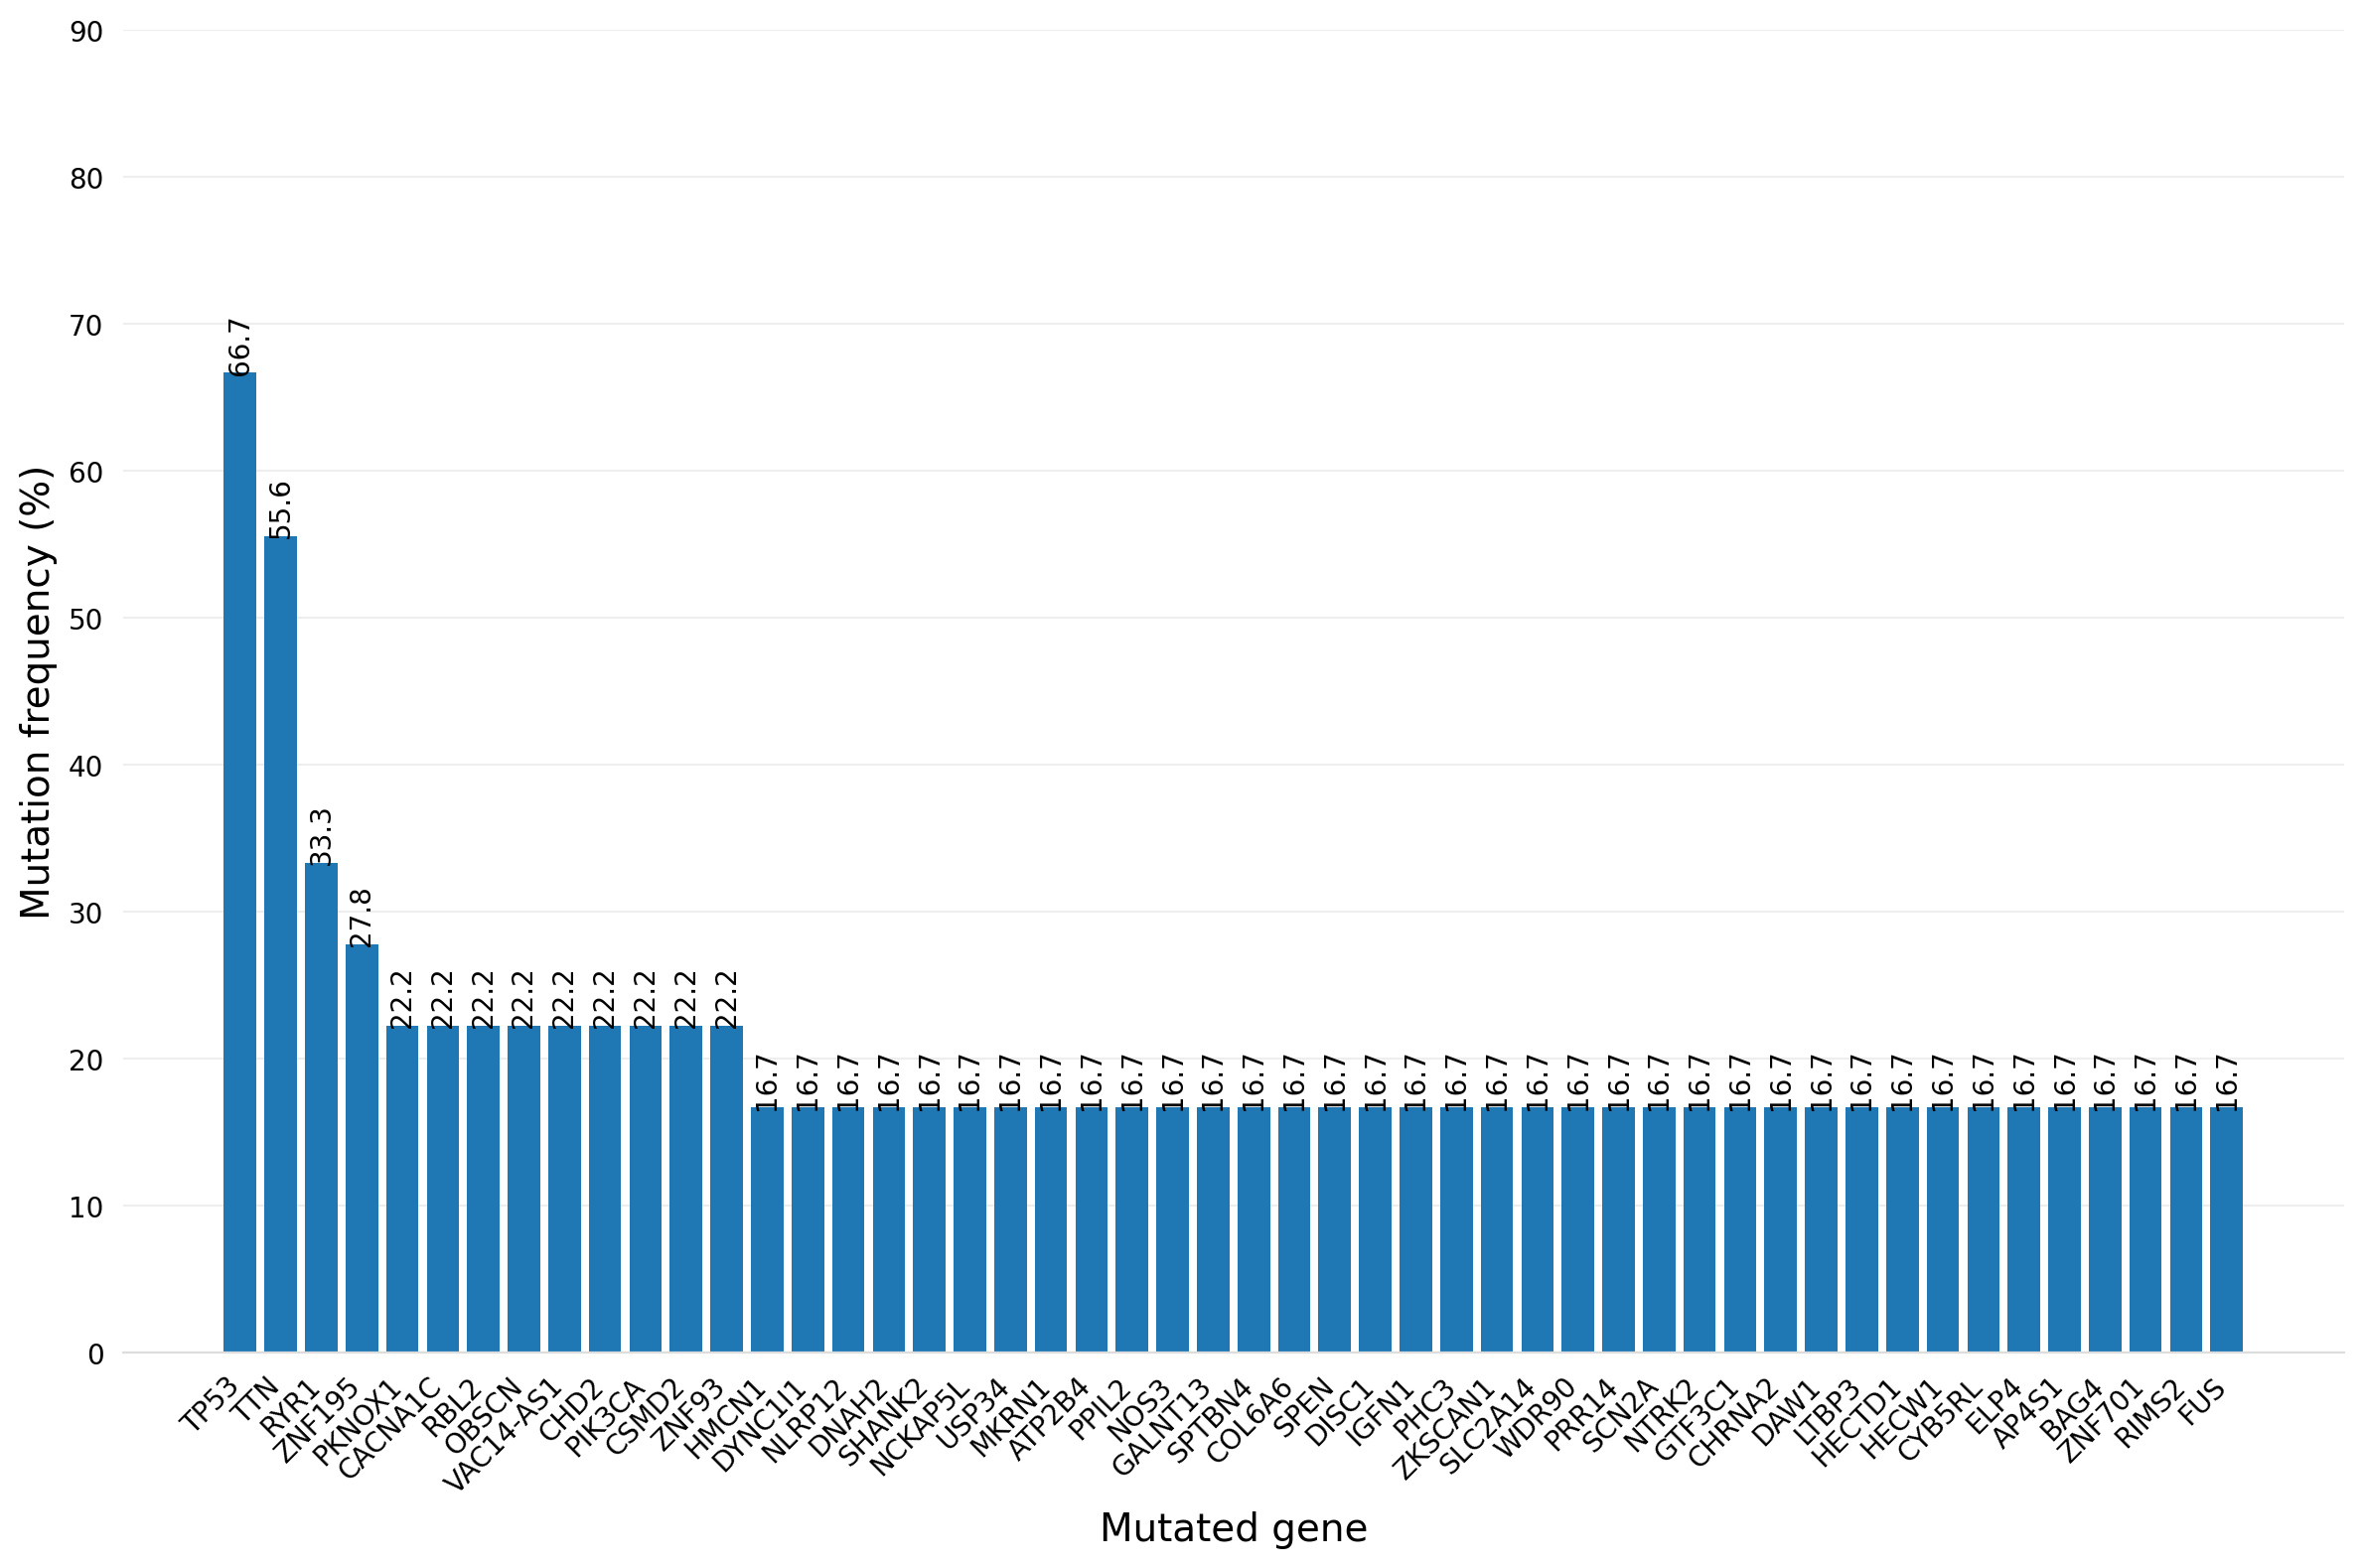

In [161]:
# increase the quality and resolution of the chart
from IPython.display import set_matplotlib_formats
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
# set default figure size.
plt.rcParams['figure.figsize'] = (12, 8)
fig, ax = plt.subplots()
h=ax.bar(highest_mutated_genes_ductal_TN['Hugo_Symbol'], highest_mutated_genes_ductal_TN['Mutation_frequency (%)'], label=mutated_gene_names)
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]

_ = plt.xticks(xticks_pos, mutated_gene_names,  ha='right', rotation=45)
#plt.title('Highest mutated genes', fontsize=14)
plt.xlabel('Mutated gene', fontsize=14)
plt.ylabel('Mutation frequency (%)', fontsize=14)

plt.ylim(0, 90)

# First, let's remove the top, right and left spines (figure borders)
# which really aren't necessary for a bar chart.
# Also, make the bottom spine gray instead of black.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)

# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add text annotations to the top of the bars.
# Note, you'll have to adjust this slightly (the 0.3)
# with different data.
for bar in h:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.3,
      round(bar.get_height(), 1),
      rotation='vertical',
      horizontalalignment='center'
  )


fig.tight_layout()

# DUCTAL NON TRIPLE-NEGATIVE 

### Mutation Rate analysis

In [162]:
data_mutation_ductal_NON_TN=pd.read_csv('mutation_table_MBCproject_NON_TN_and_ductal.csv', sep=None, engine='python')
# delete the first column, that shows the number of each row
data_mutation_ductal_NON_TN = data_mutation_ductal_NON_TN.iloc[:, 1:]
data_mutation_ductal_NON_TN

,PATIENT_ID,Tumor_Sample_Barcode,Hugo_Symbol,Chromosome,Start_Position,End_Position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,HGVSc,HGVSp_Short,Protein_position,Transcript_ID,Gene_length
0,MBCProject_1ps2hZH8,MBC-MBCProject_1ps2hZH8-Tumor-SM-DL4OO,LMOD1,1,201868736,201868736,Missense_Mutation,SNP,G,G,A,ENST00000367288.4:c.1405C>T,p.R469C,469.0,ENST00000367288,50136
1,MBCProject_1ps2hZH8,MBC-MBCProject_1ps2hZH8-Tumor-SM-DL4OO,TRIB2,2,12863539,12863539,Missense_Mutation,SNP,C,C,T,ENST00000155926.4:c.424C>T,p.R142C,142.0,ENST00000155926,25846
2,MBCProject_1ps2hZH8,MBC-MBCProject_1ps2hZH8-Tumor-SM-DL4OO,CCDC108,2,219874083,219874083,Missense_Mutation,SNP,C,C,T,ENST00000341552.5:c.4552G>A,p.D1518N,1518.0,ENST00000341552,38682
3,MBCProject_1ps2hZH8,MBC-MBCProject_1ps2hZH8-Tumor-SM-DL4OO,PIK3CA,3,178952085,178952085,Missense_Mutation,SNP,A,A,G,ENST00000263967.3:c.3140A>G,p.H1047R,1047.0,ENST00000263967,91980
4,MBCProject_1ps2hZH8,MBC-MBCProject_1ps2hZH8-Tumor-SM-DL4OO,WWC2-AS2,4,184019660,184019660,RNA,SNP,G,G,T,ENST00000578387.1:n.693C>A,p.*231*,NaN,ENST00000578387,2183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17053,MBCProject_zyt5TKFB,MBC-MBCProject_zyt5TKFB-Tumor-SM-CGM59,NRSN2,20,333991,333991,Silent,SNP,C,C,T,ENST00000382285.2:c.327C>T,p.N109=,109.0,ENST00000382285,12879
17054,MBCProject_zyt5TKFB,MBC-MBCProject_zyt5TKFB-Tumor-SM-CGM59,CHRNA4,20,61986887,61986887,Intron,SNP,G,G,C,ENST00000370263.4:c.383+440C>G,p.*128*,NaN,ENST00000370263,34334
17055,MBCProject_zyt5TKFB,MBC-MBCProject_zyt5TKFB-Tumor-SM-CGM59,CHRNA4,20,61987386,61987386,Silent,SNP,G,G,A,ENST00000370263.4:c.324C>T,p.V108=,108.0,ENST00000370263,34334
17056,MBCProject_zyt5TKFB,MBC-MBCProject_zyt5TKFB-Tumor-SM-CGM59,KCNQ2,20,62078103,62078103,Silent,SNP,G,G,A,ENST00000359125.2:c.384C>T,p.I128=,128.0,ENST00000359125,66452


In [163]:
# check if there are duplicate rows 
data_mutation_ductal_NON_TN.duplicated().sum()

0

In [164]:
data_mutation_ductal_NON_TN['PATIENT_ID'].nunique()

118

In [165]:
data_mutation_ductal_NON_TN['Tumor_Sample_Barcode'].nunique()

118

In [166]:
# add a column to the dataset representing the mutated bases length (End_Position-Start_Position+1)
data_mutation_ductal_NON_TN.loc[:, 'Mutation_length'] = data_mutation_ductal_NON_TN['End_Position']-data_mutation_ductal_NON_TN['Start_Position']+1

In [167]:
# extract PATIENT_ID and Mutation_length
pts_mutation_length_ductal_NON_TN = data_mutation_ductal_NON_TN[['PATIENT_ID', 'Mutation_length']]

In [168]:
# group by PATIENT_ID and sum the mutation lengths for each pts
mutation_ductal_NON_TN_group_by_pts=pts_mutation_length_ductal_NON_TN.groupby(['PATIENT_ID'])['Mutation_length'].sum().reset_index()
mutation_ductal_NON_TN_group_by_pts.rename(columns = {'Mutation_length':'Total_sum_mutated_bases'}, inplace = True)

In [169]:
# extract Hugo_Symbol and Gene_length
gene_length_for_each_mutation_ductal_NON_TN = data_mutation_ductal_NON_TN[['Hugo_Symbol', 'Gene_length']]

In [170]:
# look at the number of distinct genes
gene_length_for_each_mutation_ductal_NON_TN['Hugo_Symbol'].nunique()

8748

In [171]:
# group by gene (Hugo_Symbol) 
mutation_ductal_NON_TN_group_by_gene=gene_length_for_each_mutation_ductal_NON_TN.groupby(['Hugo_Symbol'])['Gene_length'].max().reset_index()

In [172]:
# compute the total gene length (for all the genes in the dataset)
total_GeneLength_ductal_NON_TN = mutation_ductal_NON_TN_group_by_gene['Gene_length'].sum()

In [173]:
# add a column to the dataset representing the mutation rate for each patient (Mutation_rate= Mutation_length/total_gene_length)
mutation_ductal_NON_TN_group_by_pts["Mutation_rate"] = mutation_ductal_NON_TN_group_by_pts["Total_sum_mutated_bases"]/total_GeneLength_ductal_NON_TN

In [174]:
# multiply the Mutation_rate values for 10^6
mutation_ductal_NON_TN_group_by_pts["Mutation_rate*10^6"] = mutation_ductal_NON_TN_group_by_pts["Mutation_rate"]*1000000

In [175]:
# the PATIENT_IDs are sorted for descending order of mutation rate 
mutation_ductal_NON_TN_group_by_pts= mutation_ductal_NON_TN_group_by_pts.sort_values(by="Mutation_rate", ascending=False)

In [176]:
patient_mutation_rate_ductal_NON_TN=mutation_ductal_NON_TN_group_by_pts[['PATIENT_ID', 'Mutation_rate*10^6' ]]

In [177]:
patients=np.arange(0,118,1)
# convert a series into a Numpy array
mutation_rate=mutation_ductal_NON_TN_group_by_pts[['Mutation_rate*10^6']].to_numpy()

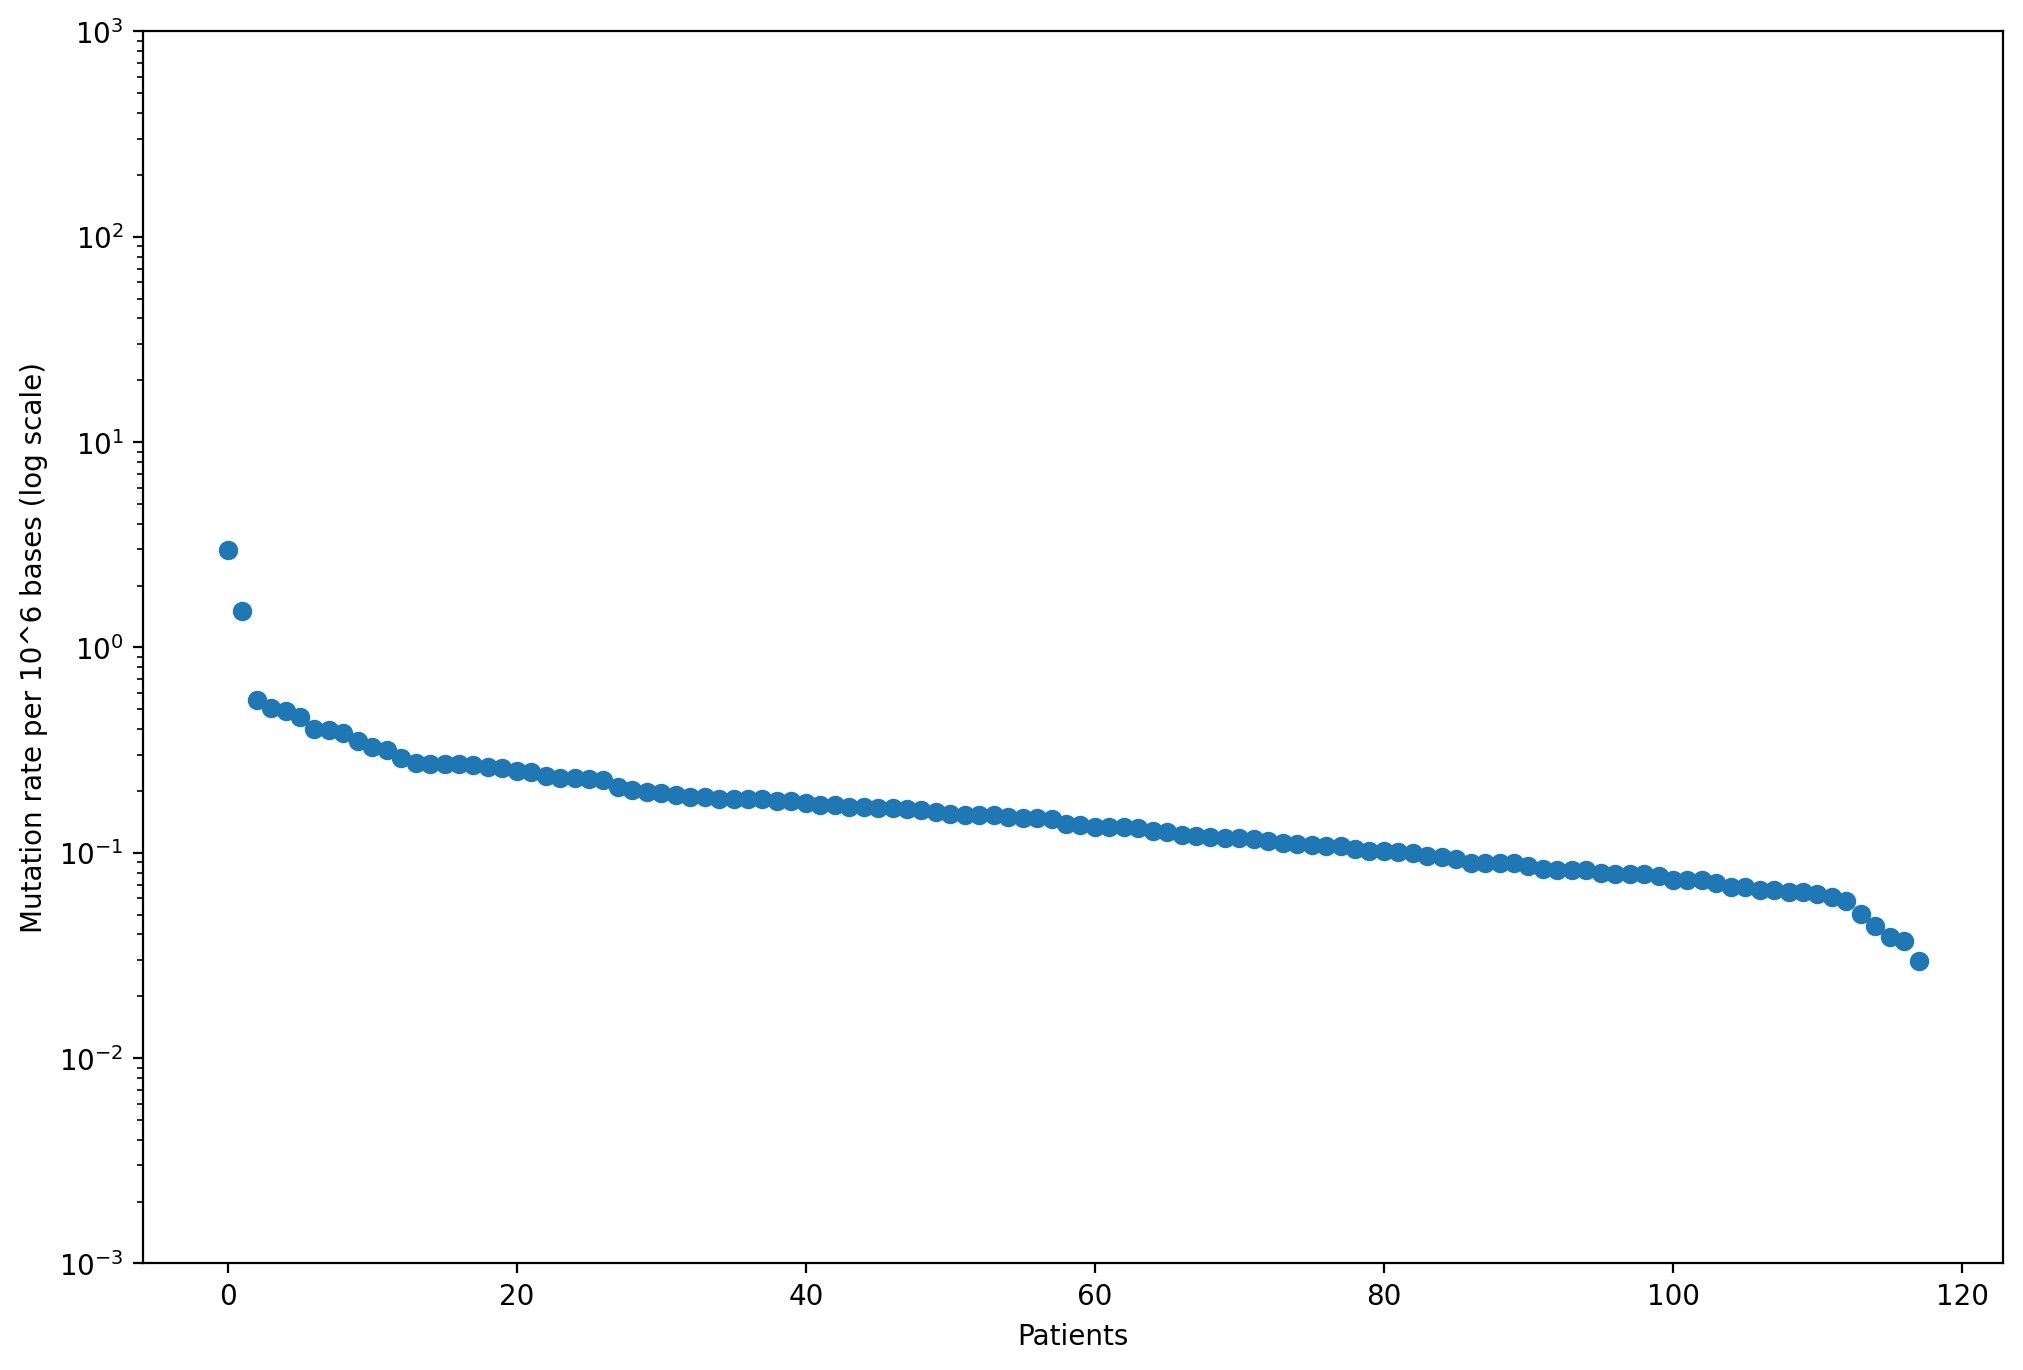

In [178]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.yscale("log") 
#set axes limit
plt.ylim(0.001, 1000)
plt.scatter(patients, mutation_rate)
plt.xlabel("Patients")
plt.ylabel("Mutation rate per 10^6 bases (log scale)")
plt.show()

### Mutation Frequency analysis

In [179]:
genes_patients_ductal_NON_TN=data_mutation_ductal_NON_TN[['PATIENT_ID', 'Hugo_Symbol']]

In [180]:
genes_patients_ductal_NON_TN=genes_patients_ductal_NON_TN.drop_duplicates()

In [181]:
n_of_pts_per_gene_ductal_NON_TN= genes_patients_ductal_NON_TN.groupby(['Hugo_Symbol'])['PATIENT_ID'].count().reset_index()
n_of_pts_per_gene_ductal_NON_TN.rename(columns = {'PATIENT_ID':'Num_pts_per_gene'}, inplace = True)

In [182]:
tot_pts_ductal_NON_TN = 118

In [183]:
# add a column to the n_of_pts_per_gene dataframe representing the mutation frequency for each gene
n_of_pts_per_gene_ductal_NON_TN["Mutation_frequency (%)"] = (n_of_pts_per_gene_ductal_NON_TN["Num_pts_per_gene"]*100)/tot_pts_ductal_NON_TN

In [184]:
# the numbers of patients per gene are sorted in descending order
n_of_pts_per_gene_ductal_NON_TN= n_of_pts_per_gene_ductal_NON_TN.sort_values(by="Num_pts_per_gene", ascending=False)

In [185]:
gene_mutation_frequency_ductal_NON_TN = n_of_pts_per_gene_ductal_NON_TN[['Hugo_Symbol', 'Mutation_frequency (%)']]

In [186]:
# select the first 50 genes
highest_mutated_genes_ductal_NON_TN=gene_mutation_frequency_ductal_NON_TN.head(50)

In [187]:
mutated_gene_names=highest_mutated_genes_ductal_NON_TN['Hugo_Symbol'].tolist()

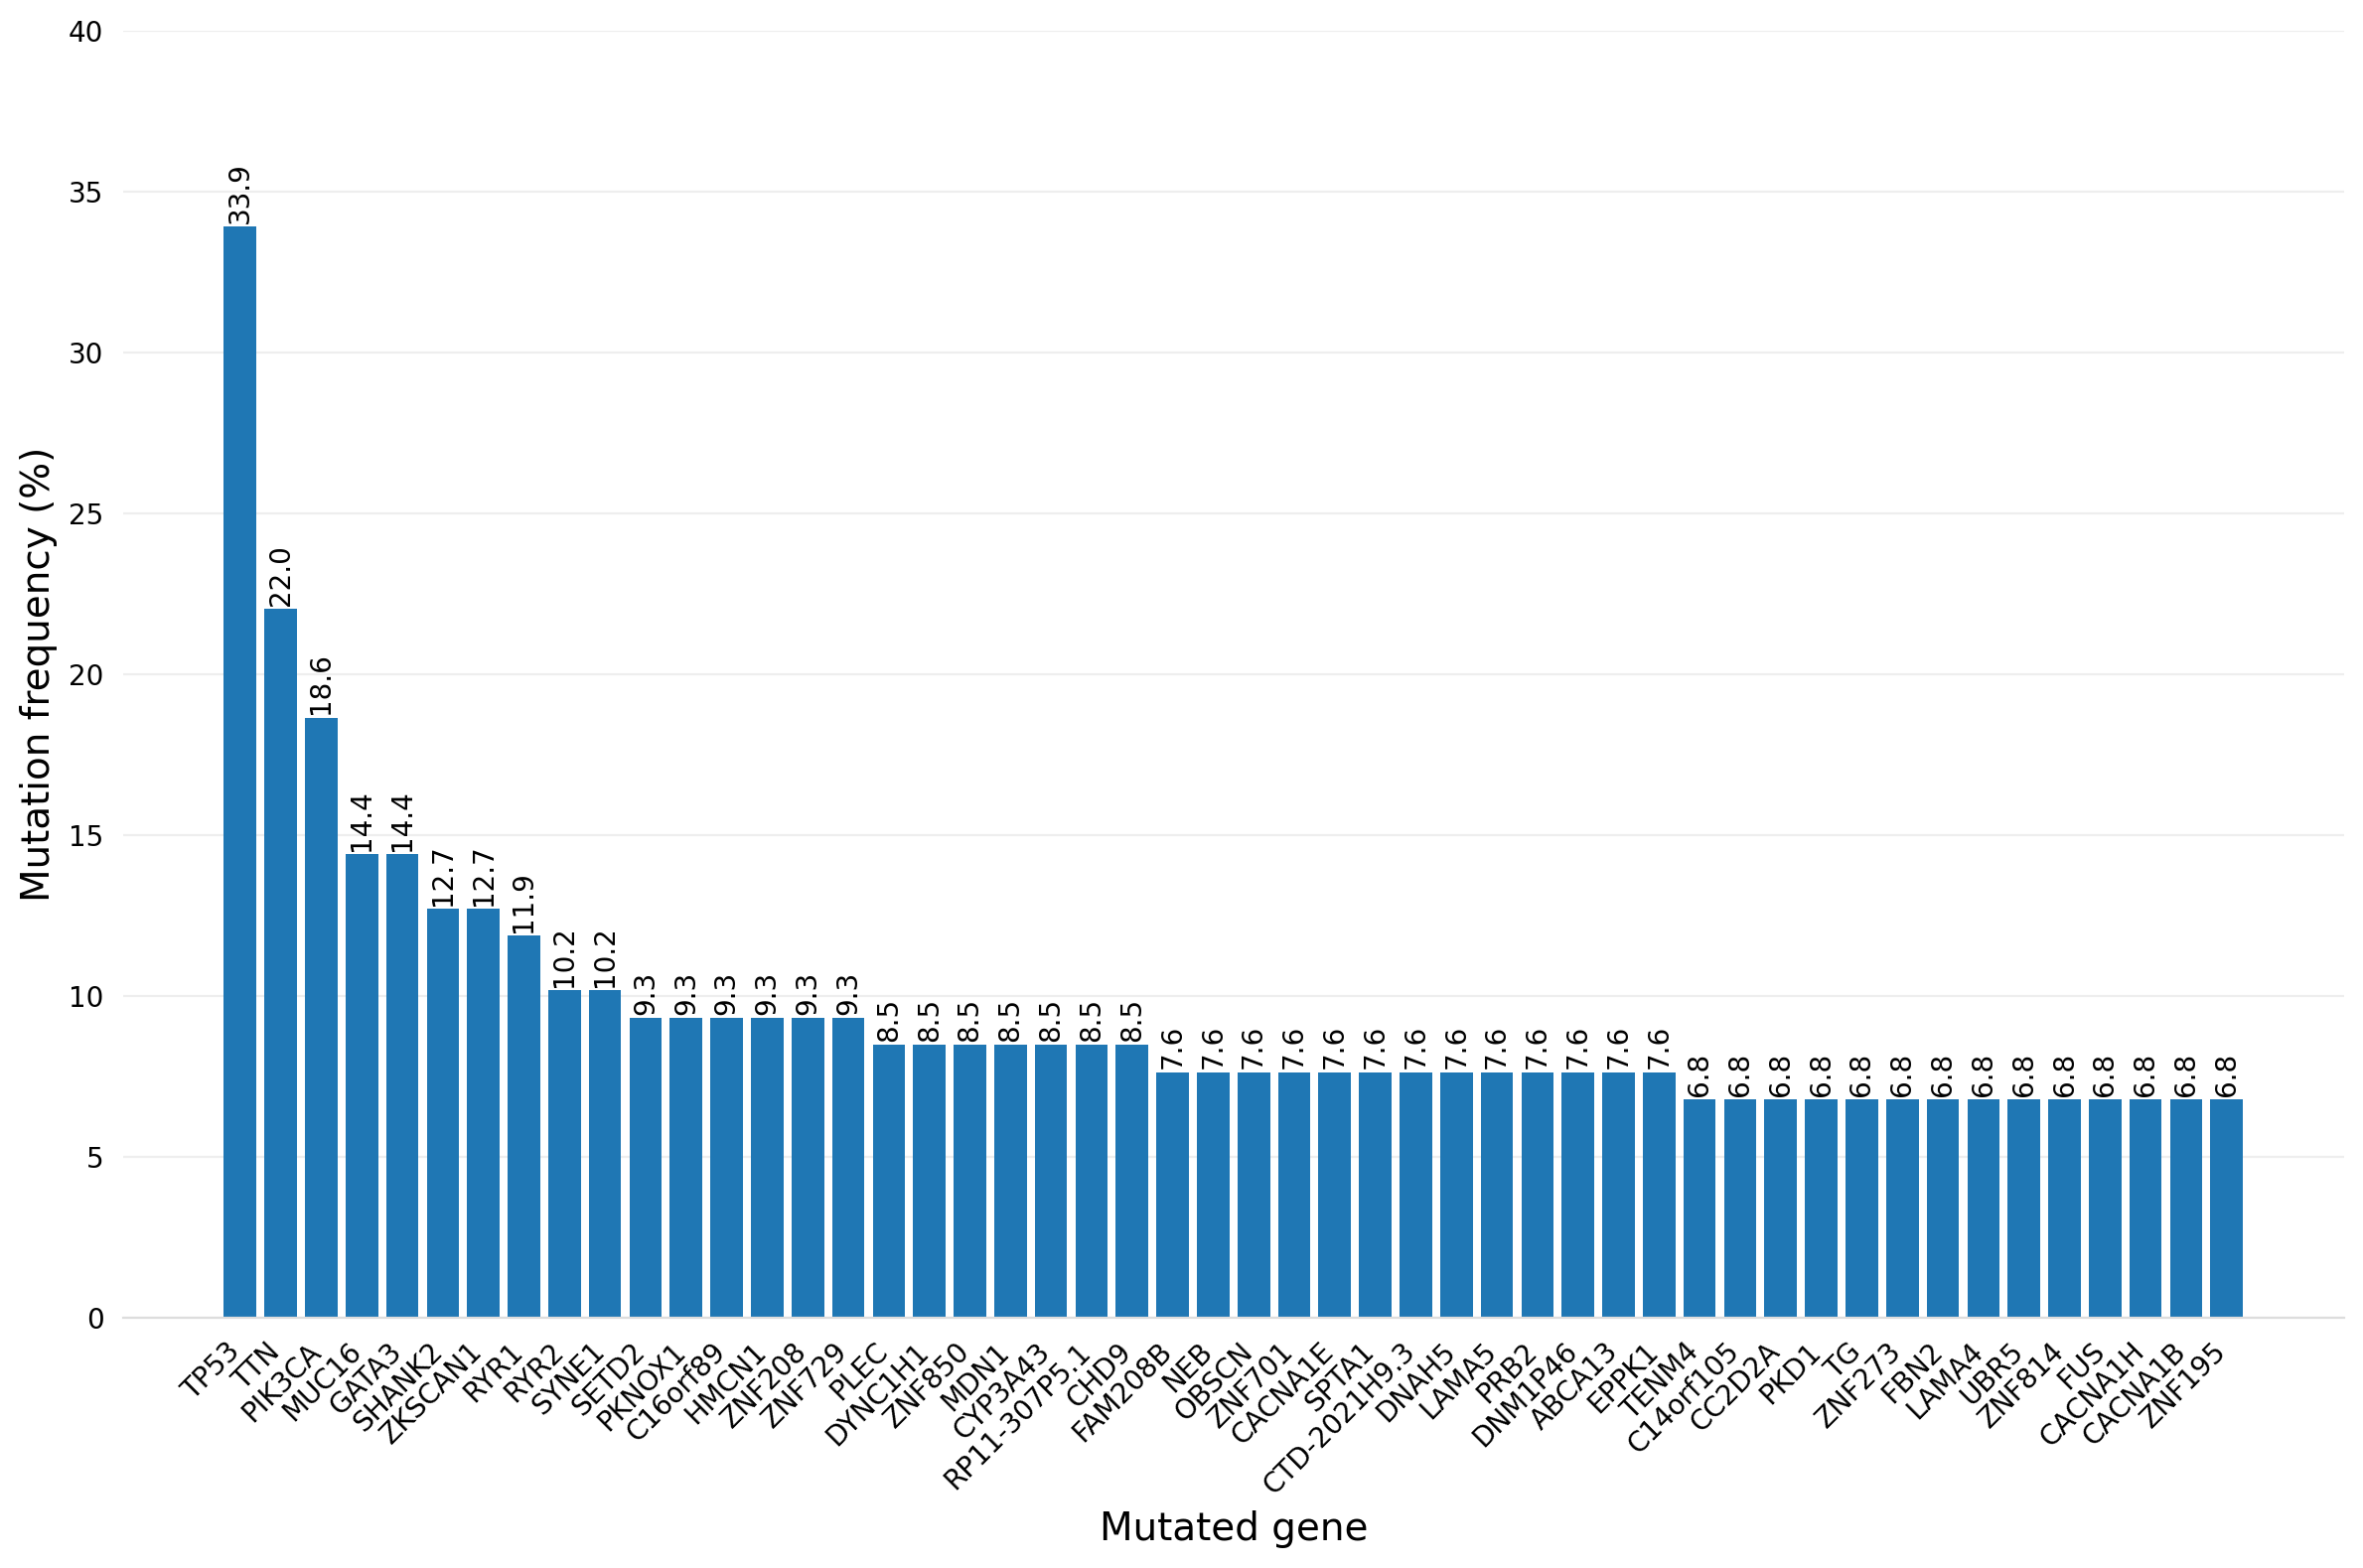

In [188]:
# increase the quality and resolution of the chart
from IPython.display import set_matplotlib_formats
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
# set default figure size.
plt.rcParams['figure.figsize'] = (12, 8)
fig, ax = plt.subplots()
h=ax.bar(highest_mutated_genes_ductal_NON_TN['Hugo_Symbol'], highest_mutated_genes_ductal_NON_TN['Mutation_frequency (%)'], label=mutated_gene_names)
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]

_ = plt.xticks(xticks_pos, mutated_gene_names,  ha='right', rotation=45)
#plt.title('Highest mutated genes', fontsize=14)
plt.xlabel('Mutated gene', fontsize=14)
plt.ylabel('Mutation frequency (%)', fontsize=14)

plt.ylim(0, 40)

# First, let's remove the top, right and left spines (figure borders)
# which really aren't necessary for a bar chart.
# Also, make the bottom spine gray instead of black.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)

# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add text annotations to the top of the bars.
# Note, you'll have to adjust this slightly (the 0.3)
# with different data.
for bar in h:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.3,
      round(bar.get_height(), 1),
      rotation='vertical',
      horizontalalignment='center'
  )


fig.tight_layout()